#  Business Case: Logistic Data - Feature Engineering

##  Problem Statement

For largest and fastest-growing fully integrated logistic player in India by revenue in Fiscal 2021, They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.<br>
The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.<br>
The company wants to understand and process the data coming out of data engineering pipelines:<br>
• Clean, sanitize and manipulate data to get useful features out of raw fields<br>
• Make sense out of the raw data and help the data science team to build forecasting models on it<br>



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats as test
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("delhivery_data.csv")

In [ ]:
data.head(12)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


In [ ]:
data.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [ ]:
data.shape

(144867, 24)

For the Given Sample it has 144867 Records and 24 features

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
data.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [ ]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'] These are the 24 columns for Given data

In [ ]:
data.loc[data['trip_uuid'] == "trip-153741093647649320"].T

,0,1,2,3,4,5,6,7,8,9
data,training,training,training,training,training,training,training,training,training,training
trip_creation_time,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840
route_schedule_uuid,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...
route_type,Carting,Carting,Carting,Carting,Carting,Carting,Carting,Carting,Carting,Carting
trip_uuid,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320
source_center,IND388121AAA,IND388121AAA,IND388121AAA,IND388121AAA,IND388121AAA,IND388620AAB,IND388620AAB,IND388620AAB,IND388620AAB,IND388620AAB
source_name,Anand_VUNagar_DC (Gujarat),Anand_VUNagar_DC (Gujarat),Anand_VUNagar_DC (Gujarat),Anand_VUNagar_DC (Gujarat),Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat)
destination_center,IND388620AAB,IND388620AAB,IND388620AAB,IND388620AAB,IND388620AAB,IND388320AAA,IND388320AAA,IND388320AAA,IND388320AAA,IND388320AAA
destination_name,Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),Anand_Vaghasi_IP (Gujarat),Anand_Vaghasi_IP (Gujarat),Anand_Vaghasi_IP (Gujarat),Anand_Vaghasi_IP (Gujarat)
od_start_time,2018-09-20 03:21:32.418600,2018-09-20 03:21:32.418600,2018-09-20 03:21:32.418600,2018-09-20 03:21:32.418600,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:47:45.236797,2018-09-20 04:47:45.236797,2018-09-20 04:47:45.236797,2018-09-20 04:47:45.236797


In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
data,144867,2,training,104858,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_creation_time,144867,14817,2018-09-28 05:23:15.359220,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route_type,144867,2,FTL,99660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_uuid,144867,14817,trip-153811219535896559,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_center,144867,1508,IND000000ACB,23347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_name,144574,1498,Gurgaon_Bilaspur_HB (Haryana),23347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destination_center,144867,1481,IND000000ACB,15192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destination_name,144606,1468,Gurgaon_Bilaspur_HB (Haryana),15192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
od_start_time,144867,26369,2018-09-21 18:37:09.322207,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Analysis of Null Values
round((data.isna().sum()/ len(data)) * 100, 3)

data                              0.000
trip_creation_time                0.000
route_schedule_uuid               0.000
route_type                        0.000
trip_uuid                         0.000
source_center                     0.000
source_name                       0.202
destination_center                0.000
destination_name                  0.180
od_start_time                     0.000
od_end_time                       0.000
start_scan_to_end_scan            0.000
is_cutoff                         0.000
cutoff_factor                     0.000
cutoff_timestamp                  0.000
actual_distance_to_destination    0.000
actual_time                       0.000
osrm_time                         0.000
osrm_distance                     0.000
factor                            0.000
segment_actual_time               0.000
segment_osrm_time                 0.000
segment_osrm_distance             0.000
segment_factor                    0.000
dtype: float64

In [ ]:
to_category = ['data', 'route_type','is_cutoff']
for x in to_category:
    data[x] = data[x].astype("category")
to_datetime = ['trip_creation_time', 'od_start_time','od_end_time','cutoff_timestamp']
for x in to_datetime:
    data[x] = pd.to_datetime(data[x])

In [ ]:
data.describe(include=['category'])

,data,route_type,is_cutoff
count,144867,144867,144867
unique,2,2,2
top,training,FTL,True
freq,104858,99660,118749


Since delivery details of one package are divided into several rows , We need to mearge it first for:
1. trip_creation_time : first,
2. route_type: first,
3. source_name: first,
4. od_start_time : first,
5. destination_name:last
6. od_start_time: first,
7. od_end_time: last,
8. start_scan_to_end_scan: last,
9. actual_distance_to_destination : last,
10. actual_time : last,
11. osrm_time: last,
12. osrm_distance: last,
13. segment_actual_time : sum,
14. segment_osrm_time: sum,
15. segment_osrm_distance: sum ,
16. data: first
This time we will group it with trip_uuid, source_center and destination_center

In [ ]:
# Merging of data
groupBy1 = {"trip_creation_time": "first", "route_type": "first", "source_name": "first","od_start_time" : "first",
            "destination_name":"last","od_start_time": "first", "od_end_time": "last","start_scan_to_end_scan": "last",
            "actual_distance_to_destination" : "last", "actual_time" : "last", "osrm_time": "last", "osrm_distance":"last",
            "segment_actual_time" : "sum", "segment_osrm_time": "sum", "segment_osrm_distance": "sum" , "data": "first"}

In [ ]:
data1 = data.groupby(['trip_uuid','source_center','destination_center']).agg(groupBy1).reset_index().sort_values(['trip_uuid', "od_start_time"])

In [ ]:
data1.head()

,trip_uuid,source_center,destination_center,trip_creation_time,route_type,source_name,od_start_time,destination_name,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,data
1,trip-153671041653548748,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,training
0,trip-153671041653548748,IND209304AAA,IND000000ACB,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,Gurgaon_Bilaspur_HB (Haryana),2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,training
3,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,training
2,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 00:00:22.886430,Carting,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,training
5,trip-153671043369099517,IND562132AAA,IND000000ACB,2018-09-12 00:00:33.691250,FTL,Bangalore_Nelmngla_H (Karnataka),2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,1710.0,2227.5270,training


In [ ]:
data1[data1['trip_uuid'] == "trip-153741093647649320"]

,trip_uuid,source_center,destination_center,trip_creation_time,route_type,source_name,od_start_time,destination_name,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,data
10374,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 02:35:36.476840,Carting,Anand_VUNagar_DC (Gujarat),2018-09-20 03:21:32.418600,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,67.0,44.0,49.4772,training
10375,trip-153741093647649320,IND388620AAB,IND388320AAA,2018-09-20 02:35:36.476840,Carting,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 04:47:45.236797,Anand_Vaghasi_IP (Gujarat),2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,100.0,44.0,53.2334,training


Even after merging it we are still able to see trip devided so we need to merge it again with trip_uuid
1. trip_creation_time : first,
2. source_center : first
3. destination_center: last
2. route_type: first,
3. source_name: first,
4. od_start_time : first,
5. destination_name:last
6. od_start_time: first,
7. od_end_time: last,
8. start_scan_to_end_scan: sum,
9. actual_distance_to_destination : sum,
10. actual_time : sum,
11. osrm_time: sum,
12. osrm_distance: sum,
13. segment_actual_time : sum,
14. segment_osrm_time: sum,
15. segment_osrm_distance: sum ,
16. data: first

In [ ]:
groupBy2 = {"trip_creation_time": "first", "source_center": "first", "destination_center": "last", "route_type": "first",
            "source_name": "first","od_start_time" : "first", "destination_name":"last","od_start_time": "first",
            "od_end_time": "last","start_scan_to_end_scan": "sum", "actual_distance_to_destination" : "sum",
            "actual_time" : "sum", "osrm_time": "sum", "osrm_distance":"sum", "segment_actual_time" : "sum",
            "segment_osrm_time": "sum", "segment_osrm_distance": "sum", "data": "first"}

In [ ]:
data1 = data1.groupby('trip_uuid').agg(groupBy2).reset_index().sort_values(['trip_uuid'])

In [ ]:
data1[data1['trip_uuid'] == "trip-153741093647649320"]

,trip_uuid,trip_creation_time,source_center,destination_center,route_type,source_name,od_start_time,destination_name,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,data
5919,trip-153741093647649320,2018-09-20 02:35:36.476840,IND388121AAA,IND388320AAA,Carting,Anand_VUNagar_DC (Gujarat),2018-09-20 03:21:32.418600,Anand_Vaghasi_IP (Gujarat),2018-09-20 06:36:55.627764,195.0,82.981842,170.0,89.0,107.4515,167.0,88.0,102.7106,training


In [ ]:
data1.shape

(14817, 18)

Now we got data in the reduced shape with 14817 records and 18 Features

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14817 entries, 0 to 14816
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   trip_creation_time              14817 non-null  datetime64[ns]
 2   source_center                   14817 non-null  object        
 3   destination_center              14817 non-null  object        
 4   route_type                      14817 non-null  category      
 5   source_name                     14807 non-null  object        
 6   od_start_time                   14817 non-null  datetime64[ns]
 7   destination_name                14809 non-null  object        
 8   od_end_time                     14817 non-null  datetime64[ns]
 9   start_scan_to_end_scan          14817 non-null  float64       
 10  actual_distance_to_destination  14817 non-null  float64       
 11  ac

In [ ]:
data1.dtypes

trip_uuid                                 object
trip_creation_time                datetime64[ns]
source_center                             object
destination_center                        object
route_type                              category
source_name                               object
od_start_time                     datetime64[ns]
destination_name                          object
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
segment_actual_time                      float64
segment_osrm_time                        float64
segment_osrm_distance                    float64
data                                    category
dtype: object

In [ ]:
data1.describe(include='all')

,trip_uuid,trip_creation_time,source_center,destination_center,route_type,source_name,od_start_time,destination_name,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,data
count,14817,14817,14817,14817,14817,14807,14817,14809,14817,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817
unique,14817,14817,868,956,2,867,14817,950,14817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,trip-153671041653548748,2018-09-12 00:00:16.535741,IND000000ACB,IND000000ACB,Carting,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,Gurgaon_Bilaspur_HB (Haryana),2018-09-13 13:40:23.123744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training
freq,1,1,948,813,8908,948,1,813,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10654
first,NaN,2018-09-12 00:00:16.535741,NaN,NaN,NaN,NaN,2018-09-12 00:00:16.535741,NaN,2018-09-12 00:50:10.814399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-10-03 23:59:42.701692,NaN,NaN,NaN,NaN,2018-10-04 20:15:07.233819,NaN,2018-10-08 03:00:24.353479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.780455,164.477838,357.143754,161.384018,204.344689,353.892286,180.949787,223.201161,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,658.652359,305.388147,561.396157,271.360995,370.395573,556.247965,314.542047,416.628374,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.000000,22.837239,67.000000,29.000000,30.819200,66.000000,31.000000,32.654500,NaN


In [ ]:
data1.describe(include=[np.number])

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000
mean,530.780455,164.477838,357.143754,161.384018,204.344689,353.892286,180.949787,223.201161
std,658.652359,305.388147,561.396157,271.360995,370.395573,556.247965,314.542047,416.628374
min,23.000000,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900
25%,149.000000,22.837239,67.000000,29.000000,30.819200,66.000000,31.000000,32.654500
50%,280.000000,48.474072,149.000000,60.000000,65.618800,147.000000,65.000000,70.154400
75%,637.000000,164.583208,370.000000,168.000000,208.475000,367.000000,185.000000,218.802400
max,7898.000000,2186.531787,6265.000000,2032.000000,2840.081000,6230.000000,2564.000000,3523.632400


In [ ]:
data1.describe(include=[np.object])

,trip_uuid,source_center,destination_center,source_name,destination_name
count,14817,14817,14817,14807,14809
unique,14817,868,956,867,950
top,trip-153671041653548748,IND000000ACB,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana)
freq,1,948,813,948,813


In [ ]:
data1.describe(include=['category'])

,route_type,data
count,14817,14817
unique,2,2
top,Carting,training
freq,8908,10654


From the analysis for categorical type data route_type feature has 2 unique values from which carting is most frequently occuring

In [ ]:
round((data1.isna().sum()/len(data1)) * 100, 3)

trip_uuid                         0.000
trip_creation_time                0.000
source_center                     0.000
destination_center                0.000
route_type                        0.000
source_name                       0.067
od_start_time                     0.000
destination_name                  0.054
od_end_time                       0.000
start_scan_to_end_scan            0.000
actual_distance_to_destination    0.000
actual_time                       0.000
osrm_time                         0.000
osrm_distance                     0.000
segment_actual_time               0.000
segment_osrm_time                 0.000
segment_osrm_distance             0.000
data                              0.000
dtype: float64

After merging operation on data the null values for source name reduced from 0.2 percent to 0.067 percent and destination name null values reduced from 0.18 percent to 0.054 percent.

In [ ]:
data1.isna().sum()

trip_uuid                          0
trip_creation_time                 0
source_center                      0
destination_center                 0
route_type                         0
source_name                       10
od_start_time                      0
destination_name                   8
od_end_time                        0
start_scan_to_end_scan             0
actual_distance_to_destination     0
actual_time                        0
osrm_time                          0
osrm_distance                      0
segment_actual_time                0
segment_osrm_time                  0
segment_osrm_distance              0
data                               0
dtype: int64

In [ ]:
data.route_type.nunique()

2

In [ ]:
for x in data1.columns:
    print("Number of unique values for feature ", x, data1[x].nunique())
    print("-------------------------------------------------------------------------------------------------------------")

Number of unique values for feature  trip_uuid 14817
-------------------------------------------------------------------------------------------------------------
Number of unique values for feature  trip_creation_time 14817
-------------------------------------------------------------------------------------------------------------
Number of unique values for feature  source_center 868
-------------------------------------------------------------------------------------------------------------
Number of unique values for feature  destination_center 956
-------------------------------------------------------------------------------------------------------------
Number of unique values for feature  route_type 2
-------------------------------------------------------------------------------------------------------------
Number of unique values for feature  source_name 867
-------------------------------------------------------------------------------------------------------------
Number 

In [ ]:
data1.route_type.value_counts(normalize=True)

Carting    0.601201
FTL        0.398799
Name: route_type, dtype: float64

As theses values are very less so we can either drop these rows or handle it. So let’s handle it using condition with route_type, For the given data around 40 % trips are FTL route type and 60 % are Carting type using mode value

In [ ]:
# Handling Missing values
data1["source_name"] = np.where(((data1['source_name'].isna()) & (data1['route_type'] == 'FTL')), data1[data1['route_type'] == 'FTL']['source_name'].mode()[0], data1['source_name'])
data1["source_name"] = np.where(((data1['source_name'].isna()) & (data1['route_type'] == 'Carting')), data1[data1['route_type'] == 'Carting']['source_name'].mode()[0], data1['source_name'])
data1["destination_name"] = np.where(((data1['destination_name'].isna()) & (data1['route_type'] == 'FTL')), data1[data1['route_type'] == 'FTL']['destination_name'].mode()[0], data1['destination_name'])
data1["destination_name"] = np.where(((data1['destination_name'].isna()) & (data1['route_type'] == 'Carting')), data1[data1['route_type'] == 'Carting']['destination_name'].mode()[0], data1['destination_name'])

In [ ]:
data1.isna().sum()

trip_uuid                         0
trip_creation_time                0
source_center                     0
destination_center                0
route_type                        0
source_name                       0
od_start_time                     0
destination_name                  0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
data                              0
dtype: int64

In [ ]:
data1['source_name_without_State'] = data1['source_name'].str.split("(").str[0]
data1['source_city'] = data1['source_name_without_State'].str.split("_").str[0]
data1['source_place'] = data1['source_name_without_State'].str.split("_").str[1]
data1['source_code'] = data1['source_name_without_State'].str.split("_").str[2]
statePattern = r'(?<=\().*\w'
stateList = [None] * len(data1['source_name'])
for x in range(len(data1['source_name'])):
    if len(re.findall(statePattern, data1['source_name'][x])) >= 1:
        stateList[x] = re.findall(statePattern, data1['source_name'][x])[0]
        #data1['source_state'][x] = (re.findall(statePattern, data1['source_name'][x])[0])
data1['source_state'] = stateList
data1['destination_name_without_State'] = data1['destination_name'].str.split("(").str[0]
data1['destination_city'] = data1['destination_name_without_State'].str.split("_").str[0]
data1['destination_place'] = data1['destination_name_without_State'].str.split("_").str[1]
data1['destination_code'] = data1['destination_name_without_State'].str.split("_").str[2]
statePattern = r'(?<=\().*\w'
DestinationStateList = [None] * len(data1['destination_name'])
for x in range(len(data1['destination_name'])):
    if len(re.findall(statePattern, data1['destination_name'][x])) >= 1:
        DestinationStateList[x] = re.findall(statePattern, data1['destination_name'][x])[0]
        #data1['source_state'][x] = (re.findall(statePattern, data1['source_name'][x])[0])
data1['destination_state'] = DestinationStateList

In [ ]:
data1.drop(['source_name_without_State','destination_name_without_State'], inplace=True, axis = 1)

In [ ]:
data1['month'] = data1['trip_creation_time'].dt.month_name()
data1['year'] = pd.DatetimeIndex(data1['trip_creation_time']).year
data1['hour'] = data1['trip_creation_time'].dt.hour
data1['day'] = data1['trip_creation_time'].dt.day_name()

o	Destination Name: Splitted and extracted features out of destination name are destination_city, destination_place, destination_code and destination_State and same performed with source name to extract source_city, source_place, source_code and source_state. Performed using split function and regex function
o	Trip_creation_time extracted month, year, hour and day features from this using datetime


In [ ]:
data1.head()

,trip_uuid,trip_creation_time,source_center,destination_center,route_type,source_name,od_start_time,destination_name,od_end_time,start_scan_to_end_scan,...,source_code,source_state,destination_city,destination_place,destination_code,destination_state,month,year,hour,day
0,trip-153671041653548748,2018-09-12 00:00:16.535741,IND462022AAA,IND000000ACB,FTL,Bhopal_Trnsport_H (Madhya Pradesh),2018-09-12 00:00:16.535741,Gurgaon_Bilaspur_HB (Haryana),2018-09-13 13:40:23.123744,2259.0,...,H,Madhya Pradesh,Gurgaon,Bilaspur,HB,Haryana,September,2018,0,Wednesday
1,trip-153671042288605164,2018-09-12 00:00:22.886430,IND572101AAA,IND562101AAA,Carting,Tumkur_Veersagr_I (Karnataka),2018-09-12 00:00:22.886430,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 03:01:59.598855,180.0,...,I,Karnataka,Chikblapur,ShntiSgr,D,Karnataka,September,2018,0,Wednesday
2,trip-153671043369099517,2018-09-12 00:00:33.691250,IND562132AAA,IND160002AAC,FTL,Bangalore_Nelmngla_H (Karnataka),2018-09-12 00:00:33.691250,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 17:34:55.442454,3933.0,...,H,Karnataka,Chandigarh,Mehmdpur,H,Punjab,September,2018,0,Wednesday
3,trip-153671046011330457,2018-09-12 00:01:00.113710,IND400072AAB,IND401104AAA,Carting,Mumbai Hub (Maharashtra),2018-09-12 00:01:00.113710,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 01:41:29.809822,100.0,...,NaN,Maharashtra,Mumbai,MiraRd,IP,Maharashtra,September,2018,0,Wednesday
4,trip-153671052974046625,2018-09-12 00:02:09.740725,IND583101AAA,IND583101AAA,FTL,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),2018-09-12 12:00:30.683231,717.0,...,NaN,Karnataka,Bellary,Dc,NaN,Karnataka,September,2018,0,Wednesday


In [ ]:
data1["Od_Start_End_Diff"] = (data1['od_end_time'] - data1['od_start_time']).astype('timedelta64[m]')
data1['OdStartEnd_StartScanToEnd'] = data1['Od_Start_End_Diff'] - data1['start_scan_to_end_scan']

In [ ]:
data1.head()

,trip_uuid,trip_creation_time,source_center,destination_center,route_type,source_name,od_start_time,destination_name,od_end_time,start_scan_to_end_scan,...,destination_city,destination_place,destination_code,destination_state,month,year,hour,day,Od_Start_End_Diff,OdStartEnd_StartScanToEnd
0,trip-153671041653548748,2018-09-12 00:00:16.535741,IND462022AAA,IND000000ACB,FTL,Bhopal_Trnsport_H (Madhya Pradesh),2018-09-12 00:00:16.535741,Gurgaon_Bilaspur_HB (Haryana),2018-09-13 13:40:23.123744,2259.0,...,Gurgaon,Bilaspur,HB,Haryana,September,2018,0,Wednesday,2260.0,1.0
1,trip-153671042288605164,2018-09-12 00:00:22.886430,IND572101AAA,IND562101AAA,Carting,Tumkur_Veersagr_I (Karnataka),2018-09-12 00:00:22.886430,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 03:01:59.598855,180.0,...,Chikblapur,ShntiSgr,D,Karnataka,September,2018,0,Wednesday,181.0,1.0
2,trip-153671043369099517,2018-09-12 00:00:33.691250,IND562132AAA,IND160002AAC,FTL,Bangalore_Nelmngla_H (Karnataka),2018-09-12 00:00:33.691250,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 17:34:55.442454,3933.0,...,Chandigarh,Mehmdpur,H,Punjab,September,2018,0,Wednesday,3934.0,1.0
3,trip-153671046011330457,2018-09-12 00:01:00.113710,IND400072AAB,IND401104AAA,Carting,Mumbai Hub (Maharashtra),2018-09-12 00:01:00.113710,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 01:41:29.809822,100.0,...,Mumbai,MiraRd,IP,Maharashtra,September,2018,0,Wednesday,100.0,0.0
4,trip-153671052974046625,2018-09-12 00:02:09.740725,IND583101AAA,IND583101AAA,FTL,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),2018-09-12 12:00:30.683231,717.0,...,Bellary,Dc,NaN,Karnataka,September,2018,0,Wednesday,718.0,1.0


In [ ]:
data1.isna().sum() / len(data1) *100

trip_uuid                          0.000000
trip_creation_time                 0.000000
source_center                      0.000000
destination_center                 0.000000
route_type                         0.000000
source_name                        0.000000
od_start_time                      0.000000
destination_name                   0.000000
od_end_time                        0.000000
start_scan_to_end_scan             0.000000
actual_distance_to_destination     0.000000
actual_time                        0.000000
osrm_time                          0.000000
osrm_distance                      0.000000
segment_actual_time                0.000000
segment_osrm_time                  0.000000
segment_osrm_distance              0.000000
data                               0.000000
source_city                        0.000000
source_place                       4.326112
source_code                       12.242694
source_state                       0.000000
destination_city                

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(data1[['source_place','source_code','destination_place','destination_code']])
data1[['source_place','source_code','destination_place','destination_code']] = imputer.transform(data1[['source_place','source_code','destination_place','destination_code']])

In [ ]:
data1.isna().sum()

trip_uuid                         0
trip_creation_time                0
source_center                     0
destination_center                0
route_type                        0
source_name                       0
od_start_time                     0
destination_name                  0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
data                              0
source_city                       0
source_place                      0
source_code                       0
source_state                      0
destination_city                  0
destination_place                 0
destination_code                  0
destination_state                 0
month                             0
year                        

In [ ]:
def outlierAnalysis(x):
     Q3, Q1 = np.percentile(x, [75 ,25])
     IQR = Q3 - Q1
     maxExcludingOutlier = Q3 + 1.5 * IQR
     minExcludingOutlier = Q1 - 1.5 * IQR
     mean = round(x.mean(),2)
     median = round(x.median(),2)
     mode = round(x.mode(), 2)
     print("For the given sample Analysis is as Follows: ")
     print("Q1: ", Q1)
     print("Q3: ", Q3)
     print("Mean: ", round(x.mean(),2))
     print("Median: ", x.median())
     print("Mode: " , round(x.mode(), 2))
     print("IQR: " , IQR)
     print("Maximum Excluding Outlier: " , maxExcludingOutlier)
     print("Minimum Purchase Excluding Outlier: " , minExcludingOutlier)

## 1. Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.

In [ ]:
data1['OdStartEnd_StartScanToEnd'].describe()

count    14817.000000
mean        16.180536
std         75.715947
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max       2362.000000
Name: OdStartEnd_StartScanToEnd, dtype: float64

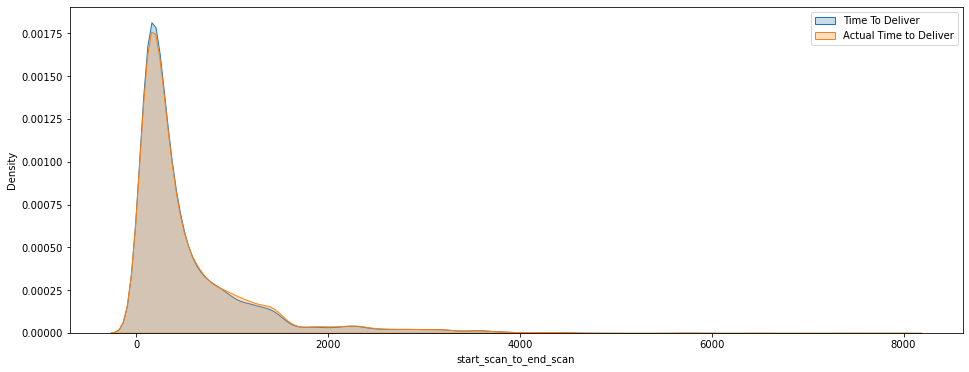

In [ ]:
plt.figure(figsize=(16,6))
sns.kdeplot((data1['start_scan_to_end_scan']), label = "Time To Deliver", fill= True)
sns.kdeplot((data1['Od_Start_End_Diff']), label = "Actual Time to Deliver", fill= True)
plt.legend()
plt.show()

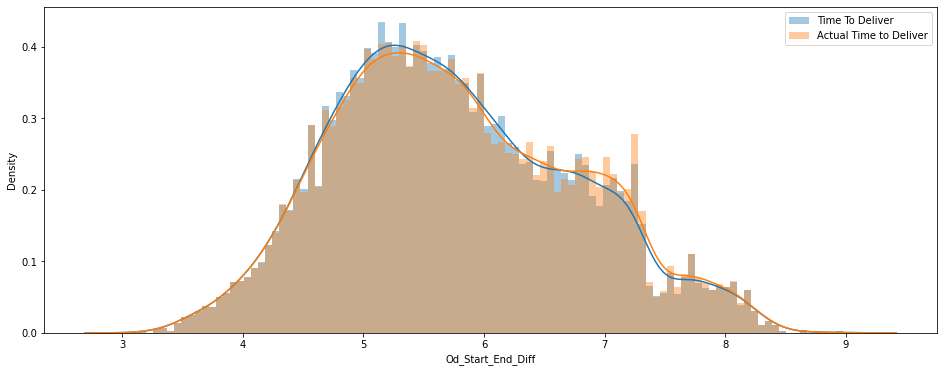

In [ ]:
plt.figure(figsize=(16,6))
sns.distplot(np.log(data1['start_scan_to_end_scan']), hist=True, kde=True, label = "Time To Deliver", bins = 100)
sns.distplot(np.log(data1['Od_Start_End_Diff']), hist=True, kde=True, label = "Actual Time to Deliver", bins = 100)
plt.legend()
plt.show()

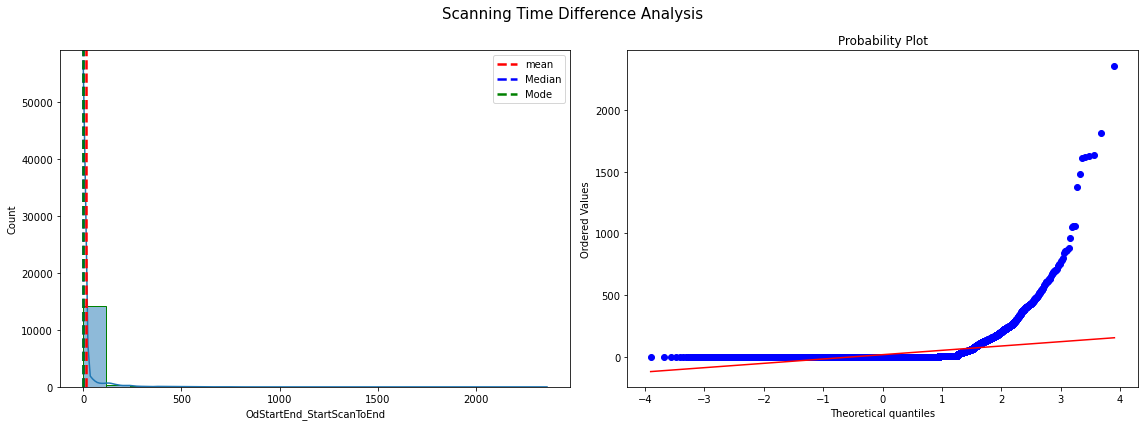

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), squeeze=False)
plt.suptitle("Scanning Time Difference Analysis", fontsize = 15)
g1 = sns.histplot(data1['OdStartEnd_StartScanToEnd'], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
g1.axvline(data1['OdStartEnd_StartScanToEnd'].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
g1.axvline(data1['OdStartEnd_StartScanToEnd'].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
g1.axvline(data1['OdStartEnd_StartScanToEnd'].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
g1.legend()
stats.probplot(data1['OdStartEnd_StartScanToEnd'], dist="norm", plot=axs[0, 1])
plt.tight_layout()
plt.show()

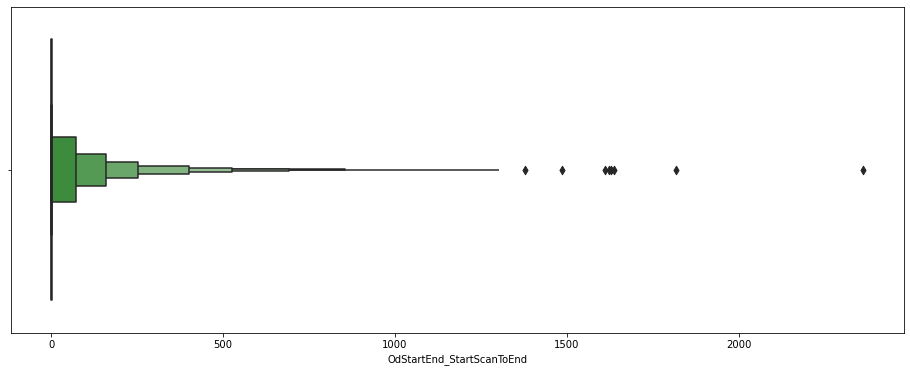

In [ ]:
plt.figure(figsize=(16,6))
sns.boxenplot(data1['OdStartEnd_StartScanToEnd'], color = 'green')
plt.show()

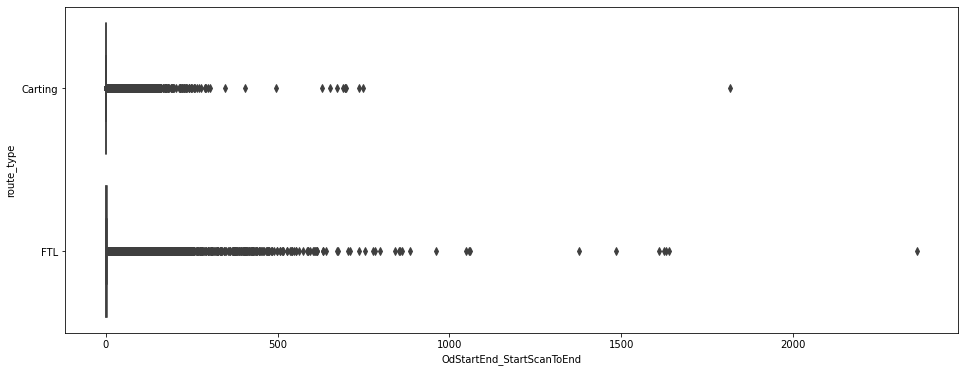

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(x="OdStartEnd_StartScanToEnd",y ='route_type', data=data1)
plt.show()

In [ ]:
outlierAnalysis(data1['OdStartEnd_StartScanToEnd'])

For the given sample Analysis is as Follows: 
Q1:  0.0
Q3:  1.0
Mean:  16.18
Median:  0.0
Mode:  0    0.0
dtype: float64
IQR:  1.0
Maximum Excluding Outlier:  2.5
Minimum Purchase Excluding Outlier:  -1.5


In [ ]:
q1 = data1['OdStartEnd_StartScanToEnd'].quantile(0.25)
q3 = data1['OdStartEnd_StartScanToEnd'].quantile(0.75)
iqr = q3 - q1

In [ ]:
OdStartEnd_StartScanToEnd = data1[(data1['OdStartEnd_StartScanToEnd'] <= q3 + 1.5 * iqr) & (data1['OdStartEnd_StartScanToEnd'] >= q1 - 1.5 * iqr)]

In [ ]:
OdStartEnd_StartScanToEnd.OdStartEnd_StartScanToEnd.describe()

count    13039.000000
mean         0.278089
std          0.559653
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: OdStartEnd_StartScanToEnd, dtype: float64

In [ ]:
OdStartEnd_StartScanToEnd.OdStartEnd_StartScanToEnd.value_counts()

0.0    10146
1.0     2160
2.0      733
Name: OdStartEnd_StartScanToEnd, dtype: int64

In [ ]:
OdStartEnd_StartScanToEnd.OdStartEnd_StartScanToEnd.value_counts(normalize=True)

0.0    0.778127
1.0    0.165657
2.0    0.056216
Name: OdStartEnd_StartScanToEnd, dtype: float64

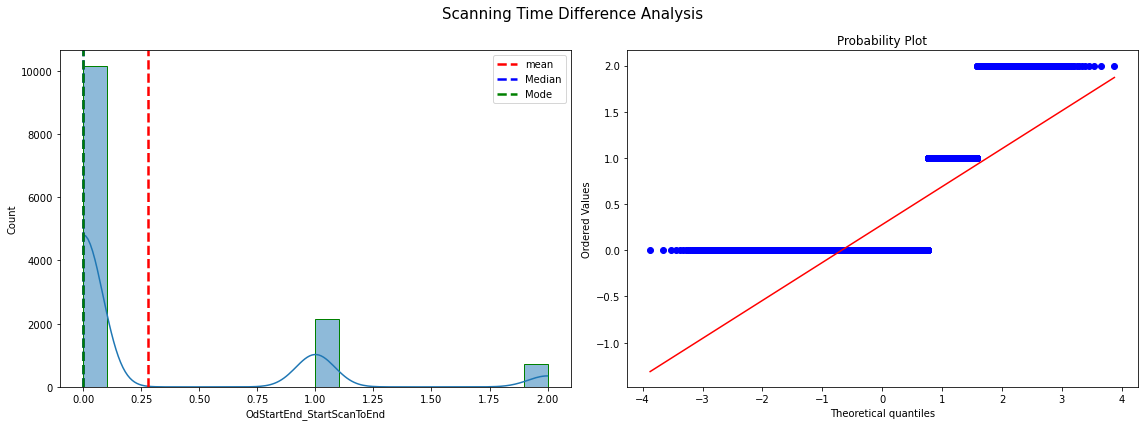

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), squeeze=False)
plt.suptitle("Scanning Time Difference Analysis", fontsize = 15)
g1 = sns.histplot(OdStartEnd_StartScanToEnd['OdStartEnd_StartScanToEnd'], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
g1.axvline(OdStartEnd_StartScanToEnd['OdStartEnd_StartScanToEnd'].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
g1.axvline(OdStartEnd_StartScanToEnd['OdStartEnd_StartScanToEnd'].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
g1.axvline(OdStartEnd_StartScanToEnd['OdStartEnd_StartScanToEnd'].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode')
g1.legend()
stats.probplot(OdStartEnd_StartScanToEnd['OdStartEnd_StartScanToEnd'], dist="norm", plot=axs[0, 1])
plt.tight_layout()
plt.show()

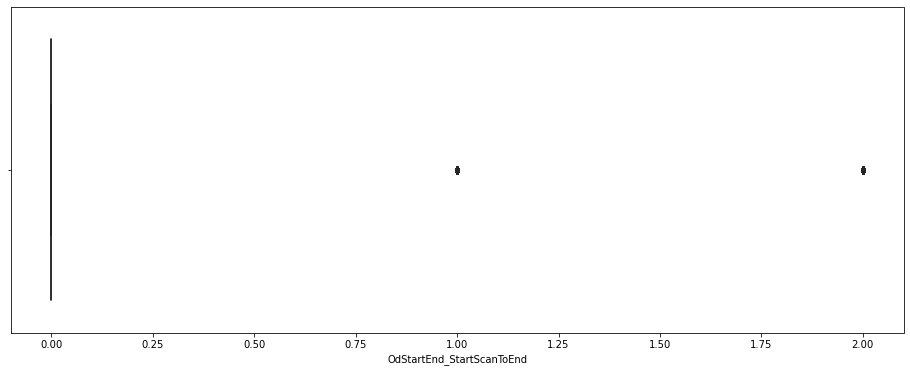

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(OdStartEnd_StartScanToEnd['OdStartEnd_StartScanToEnd'], color = 'green')
plt.show()

# Hypothesis Testing

1. H0= Mean of scanning Time differences is 0
2. Ha= mean of scanning time differece is not equal to 0 (Two tail test)
alpha = 0.05

In [ ]:
stats.ttest_1samp(a = OdStartEnd_StartScanToEnd['OdStartEnd_StartScanToEnd'], alternative='two-sided', popmean = 0)

Ttest_1sampResult(statistic=56.739681098949774, pvalue=0.0)

## 2. Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

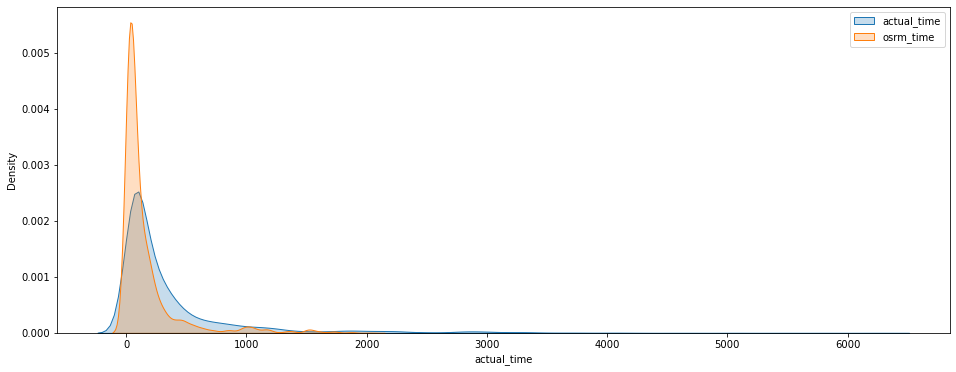

In [ ]:
plt.figure(figsize=(16,6))
sns.kdeplot(data1['actual_time'], label = "actual_time", fill= True)
sns.kdeplot(data1['osrm_time'], label = "osrm_time", fill = True)
plt.legend()
plt.show()

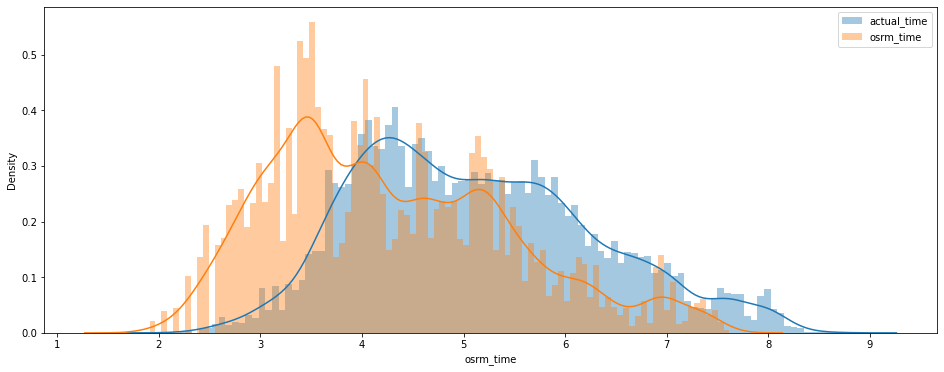

In [ ]:
plt.figure(figsize=(16,6))
sns.distplot(np.log(data1['actual_time']), hist=True, kde=True, label = "actual_time", bins = 100)
sns.distplot(np.log(data1['osrm_time']), hist=True, kde=True, label = "osrm_time", bins = 100)
plt.legend()
plt.show()

In [ ]:
print('\033[1m' + "Actual Time Description" + '\033[0m')
print(data1['actual_time'].describe())
print('\033[1m' + "-------------------------------------------------------------------------------------------------------------------------" + '\033[0m')
print('\033[1m' + "OSRM Time Description" + '\033[0m')
print(data1['osrm_time'].describe())

Actual Time Description
count    14817.000000
mean       357.143754
std        561.396157
min          9.000000
25%         67.000000
50%        149.000000
75%        370.000000
max       6265.000000
Name: actual_time, dtype: float64
-------------------------------------------------------------------------------------------------------------------------
OSRM Time Description
count    14817.000000
mean       161.384018
std        271.360995
min          6.000000
25%         29.000000
50%         60.000000
75%        168.000000
max       2032.000000
Name: osrm_time, dtype: float64


Here from the statistical data std dev for Actual Time is much higher than the std dev for OSRM Time.
Max Actual time 6265 while for OSRM it is 2032.

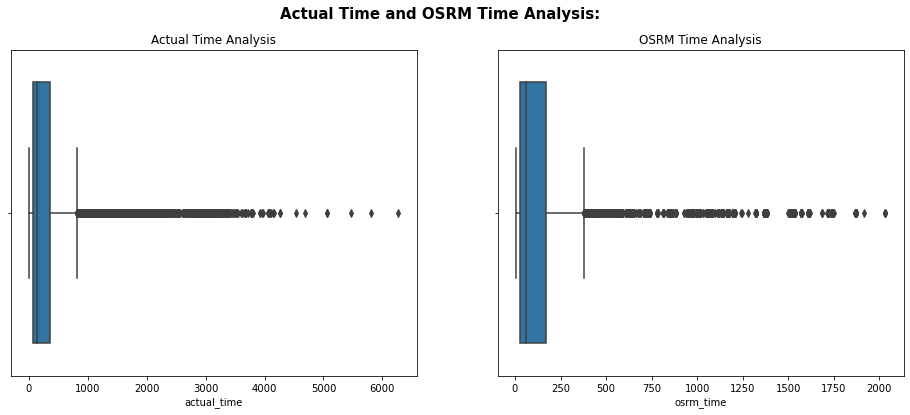

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=False)
suptitle = "Actual Time and OSRM Time Analysis: "
fig.suptitle(suptitle , fontsize=15, fontweight='bold')
graph = sns.boxplot(x = data1['actual_time'], data= data1, dodge = False , ax = axs[0])
title1 = "Actual Time Analysis"
graph.set_title(title1, fontsize = 12)
graph2 = sns.boxplot(x = data1['osrm_time'], data = data1 , dodge=False, ax = axs[1])
title1 = "OSRM Time Analysis"
graph2.set_title(title1, fontsize = 12)
plt.show()

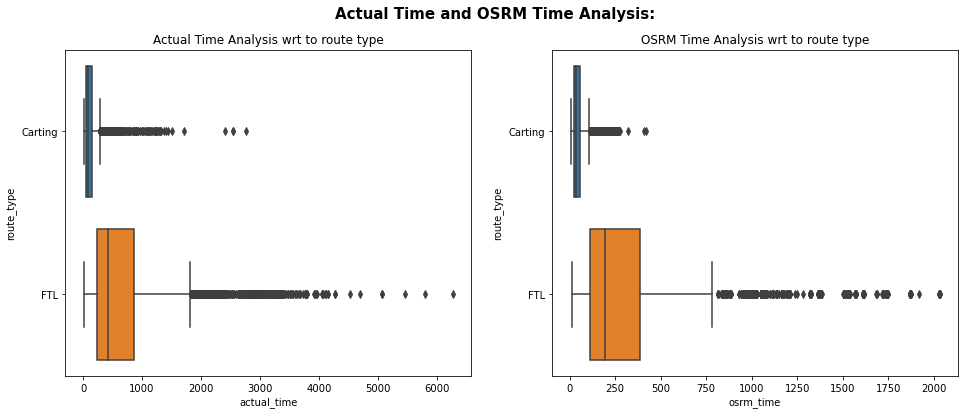

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=False)
suptitle = "Actual Time and OSRM Time Analysis: "
fig.suptitle(suptitle , fontsize=15, fontweight='bold')
graph = sns.boxplot(x = data1['actual_time'],y = data1['route_type'] ,data= data1, dodge = False , ax = axs[0])
title1 = "Actual Time Analysis wrt to route type"
graph.set_title(title1, fontsize = 12)
graph2 = sns.boxplot(x = data1['osrm_time'],y = data1['route_type'], data = data1 , dodge=False, ax = axs[1])
title1 = "OSRM Time Analysis wrt to route type"
graph2.set_title(title1, fontsize = 12)
plt.show()

In [ ]:
print('\033[1m' + "Actual Time Outlier Analysis" + '\033[0m')
print(outlierAnalysis(data1['actual_time']))
print('\033[1m' + "-------------------------------------------------------------------------------------------------------------------------" + '\033[0m')
print('\033[1m' + "OSRM Time Outlier Analysis" + '\033[0m')
print(outlierAnalysis(data1['osrm_time']))

Actual Time Outlier Analysis
For the given sample Analysis is as Follows: 
Q1:  67.0
Q3:  370.0
Mean:  357.14
Median:  149.0
Mode:  0    60.0
dtype: float64
IQR:  303.0
Maximum Excluding Outlier:  824.5
Minimum Purchase Excluding Outlier:  -387.5
None
-------------------------------------------------------------------------------------------------------------------------
OSRM Time Outlier Analysis
For the given sample Analysis is as Follows: 
Q1:  29.0
Q3:  168.0
Mean:  161.38
Median:  60.0
Mode:  0    34.0
dtype: float64
IQR:  139.0
Maximum Excluding Outlier:  376.5
Minimum Purchase Excluding Outlier:  -179.5
None


In [ ]:
actual_time = data1[(data1['actual_time'] >= -387.5) & (data1['actual_time'] <= 824.5)]['actual_time']
osrm_time = data1[(data1['osrm_time'] >=-179.5) & (data1['osrm_time'] <= 376.5)]['osrm_time']

In [ ]:
print('\033[1m' + "Actual Time Description after outlier treatment" + '\033[0m')
print(actual_time.describe())
print('\033[1m' + "-------------------------------------------------------------------------------------------------------------------------" + '\033[0m')
print('\033[1m' + "OSRM Time Description after outler treatment" + '\033[0m')
print(osrm_time.describe())

Actual Time Description after outlier treatment
count    13174.000000
mean       193.928040
std        180.251753
min          9.000000
25%         62.000000
50%        120.000000
75%        273.000000
max        824.000000
Name: actual_time, dtype: float64
-------------------------------------------------------------------------------------------------------------------------
OSRM Time Description after outler treatment
count    13300.000000
mean        85.034436
std         79.828557
min          6.000000
25%         28.000000
50%         52.000000
75%        121.000000
max        376.000000
Name: osrm_time, dtype: float64


In [ ]:
osrm_time = osrm_time.sample(13174)
osrm_time.describe()

count    13174.000000
mean        85.061864
std         79.805954
min          6.000000
25%         28.000000
50%         52.000000
75%        121.750000
max        376.000000
Name: osrm_time, dtype: float64

In [ ]:
print(np.var(actual_time)/np.var(osrm_time))

5.101388650943954


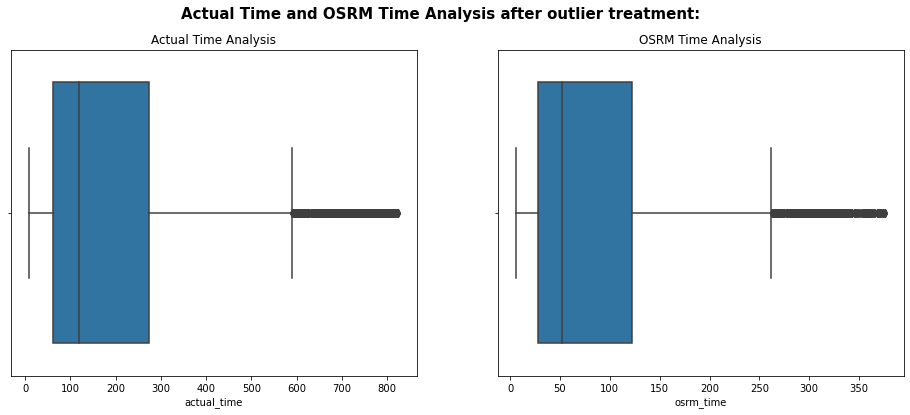

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=False)
suptitle = "Actual Time and OSRM Time Analysis after outlier treatment: "
fig.suptitle(suptitle , fontsize=15, fontweight='bold')
graph = sns.boxplot(x = actual_time, dodge = False , ax = axs[0])
title1 = "Actual Time Analysis"
graph.set_title(title1, fontsize = 12)
graph2 = sns.boxplot(osrm_time , dodge=False, ax = axs[1])
title1 = "OSRM Time Analysis"
graph2.set_title(title1, fontsize = 12)
plt.show()

In [ ]:
stats.ttest_ind(actual_time, osrm_time, equal_var = False, alternative= 'greater')

Ttest_indResult(statistic=63.387286392063025, pvalue=0.0)

## 3)	Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

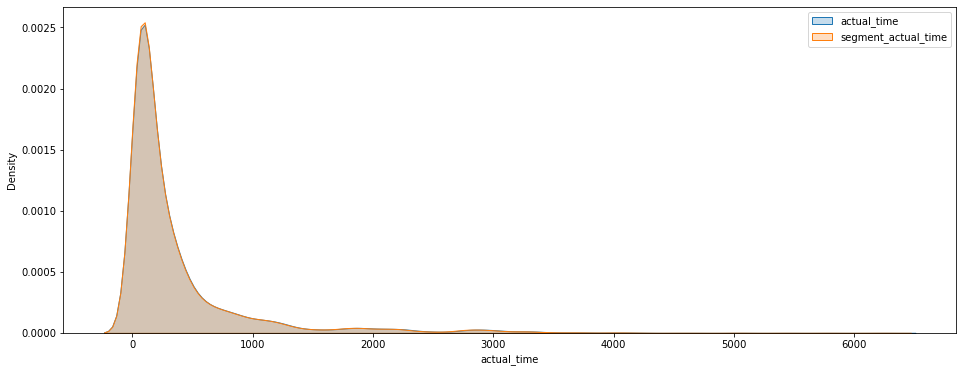

In [ ]:
plt.figure(figsize=(16,6))
sns.kdeplot(data1['actual_time'], label = "actual_time", fill= True)
sns.kdeplot(data1['segment_actual_time'], label = "segment_actual_time", fill = True)
plt.legend()
plt.show()

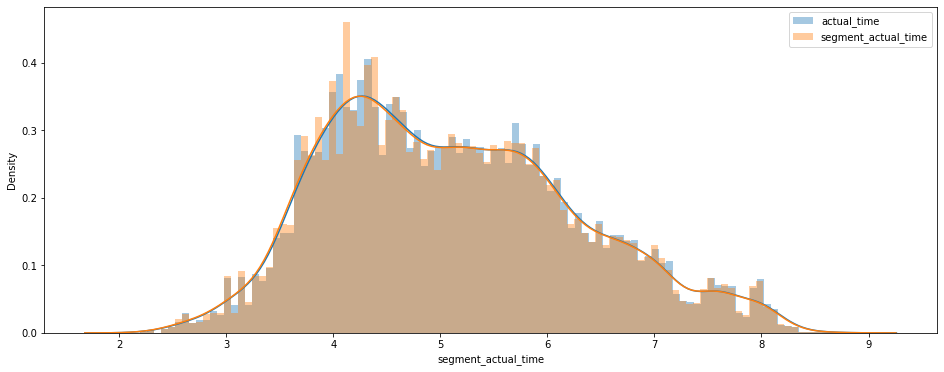

In [ ]:
plt.figure(figsize=(16,6))
sns.distplot(np.log(data1['actual_time']), hist=True, kde=True, label = "actual_time", bins = 100)
sns.distplot(np.log(data1['segment_actual_time']), hist=True, kde=True, label = "segment_actual_time", bins = 100)
plt.legend()
plt.show()

In [ ]:
print('\033[1m' + "Actual Time Description" + '\033[0m')
print(data1['actual_time'].describe())
print('\033[1m' + "-------------------------------------------------------------------------------------------------------------------------" + '\033[0m')
print('\033[1m' + "Segmented Actual Time Description" + '\033[0m')
print(data1['segment_actual_time'].describe())

Actual Time Description
count    14817.000000
mean       357.143754
std        561.396157
min          9.000000
25%         67.000000
50%        149.000000
75%        370.000000
max       6265.000000
Name: actual_time, dtype: float64
-------------------------------------------------------------------------------------------------------------------------
Segmented Actual Time Description
count    14817.000000
mean       353.892286
std        556.247965
min          9.000000
25%         66.000000
50%        147.000000
75%        367.000000
max       6230.000000
Name: segment_actual_time, dtype: float64


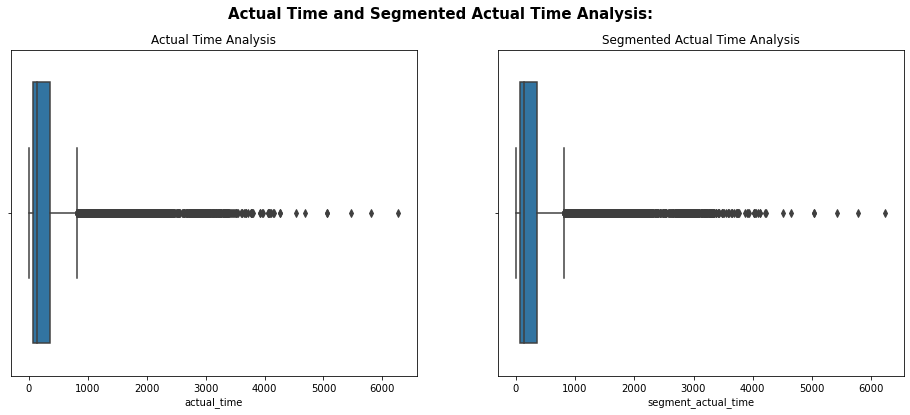

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=False)
suptitle = "Actual Time and Segmented Actual Time Analysis: "
fig.suptitle(suptitle , fontsize=15, fontweight='bold')
graph = sns.boxplot(x = data1['actual_time'], data= data1, dodge = False , ax = axs[0])
title1 = "Actual Time Analysis"
graph.set_title(title1, fontsize = 12)
graph2 = sns.boxplot(x = data1['segment_actual_time'], data = data1 , dodge=False, ax = axs[1])
title1 = "Segmented Actual Time Analysis"
graph2.set_title(title1, fontsize = 12)
plt.show()

From the boxplots we can see that somewhere around 1000 they started to show outliers. And from the visual analysis it seems they both have outliers

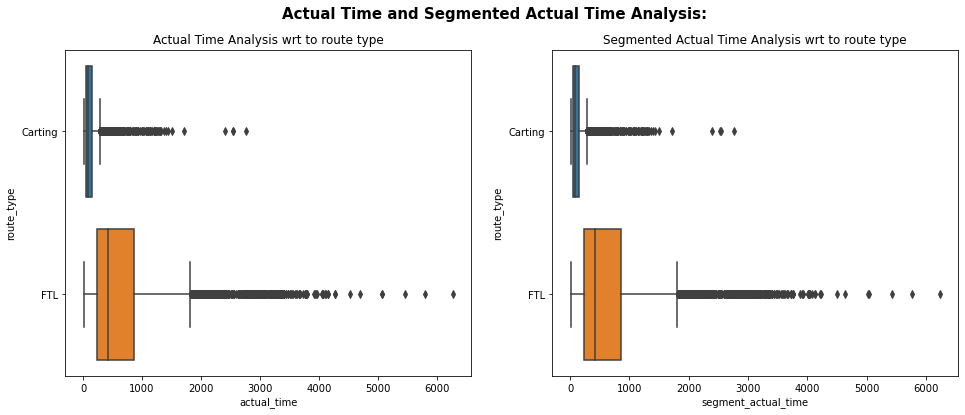

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=False)
suptitle = "Actual Time and Segmented Actual Time Analysis: "
fig.suptitle(suptitle , fontsize=15, fontweight='bold')
graph = sns.boxplot(x = data1['actual_time'],y = data1['route_type'] ,data= data1, dodge = False , ax = axs[0])
title1 = "Actual Time Analysis wrt to route type"
graph.set_title(title1, fontsize = 12)
graph2 = sns.boxplot(x = data1['segment_actual_time'],y = data1['route_type'], data = data1 , dodge=False, ax = axs[1])
title1 = "Segmented Actual Time Analysis wrt to route type"
graph2.set_title(title1, fontsize = 12)
plt.show()

In [ ]:
print('\033[1m' + "Actual Time Outlier Analysis" + '\033[0m')
print(outlierAnalysis(data1['actual_time']))
print('\033[1m' + "-------------------------------------------------------------------------------------------------------------------------" + '\033[0m')
print('\033[1m' + "Segmneted Actual time Outlier Analysis" + '\033[0m')
print(outlierAnalysis(data1['segment_actual_time']))

Actual Time Outlier Analysis
For the given sample Analysis is as Follows: 
Q1:  67.0
Q3:  370.0
Mean:  357.14
Median:  149.0
Mode:  0    60.0
dtype: float64
IQR:  303.0
Maximum Excluding Outlier:  824.5
Minimum Purchase Excluding Outlier:  -387.5
None
-------------------------------------------------------------------------------------------------------------------------
Segmneted Actual time Outlier Analysis
For the given sample Analysis is as Follows: 
Q1:  66.0
Q3:  367.0
Mean:  353.89
Median:  147.0
Mode:  0    47.0
dtype: float64
IQR:  301.0
Maximum Excluding Outlier:  818.5
Minimum Purchase Excluding Outlier:  -385.5
None


In [ ]:
actual_time = data1[(data1['actual_time'] >= -387.5) & (data1['actual_time'] <= 824.5)]['actual_time']
segment_actual_time = data1[(data1['segment_actual_time'] >=-385.5) & (data1['segment_actual_time'] <= 818.5)]['segment_actual_time']

In [ ]:
print('\033[1m' + "Actual Time Description after outlier treatment" + '\033[0m')
print(actual_time.describe())
print('\033[1m' + "-------------------------------------------------------------------------------------------------------------------------" + '\033[0m')
print('\033[1m' + "Segmented Actual Time Description after outler treatment" + '\033[0m')
print(segment_actual_time.describe())

Actual Time Description after outlier treatment
count    13174.000000
mean       193.928040
std        180.251753
min          9.000000
25%         62.000000
50%        120.000000
75%        273.000000
max        824.000000
Name: actual_time, dtype: float64
-------------------------------------------------------------------------------------------------------------------------
Segmented Actual Time Description after outler treatment
count    13174.000000
mean       192.116441
std        178.928761
min          9.000000
25%         61.000000
50%        119.000000
75%        271.000000
max        818.000000
Name: segment_actual_time, dtype: float64


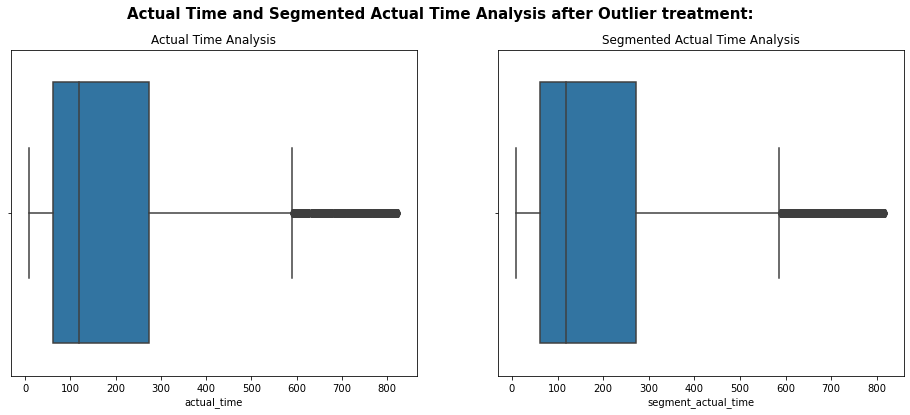

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=False)
suptitle = "Actual Time and Segmented Actual Time Analysis after Outlier treatment: "
fig.suptitle(suptitle , fontsize=15, fontweight='bold')
graph = sns.boxplot(x = actual_time, dodge = False , ax = axs[0])
title1 = "Actual Time Analysis"
graph.set_title(title1, fontsize = 12)
graph2 = sns.boxplot(x = segment_actual_time, dodge=False, ax = axs[1])
title1 = "Segmented Actual Time Analysis"
graph2.set_title(title1, fontsize = 12)
plt.show()

### Kolmogorov-Smirnov(KS) test

In [ ]:
stats.ks_2samp(actual_time, segment_actual_time)

KstestResult(statistic=0.007135266433884929, pvalue=0.8882301165425635)

From the output we can see that the test statistic is 0.007 and the corresponding p-value is 0.888. Since the p-value is greater than 0.05, we accept the null hypothesis. We have sufficient evidence to say that the two sample actual time and segmented actual time come from the same distribution.

### 2 sample T test

In [ ]:
stats.ttest_ind(a=actual_time, b=segment_actual_time, equal_var=True)

Ttest_indResult(statistic=0.8186911401576081, pvalue=0.4129700577197134)

## 4)	Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

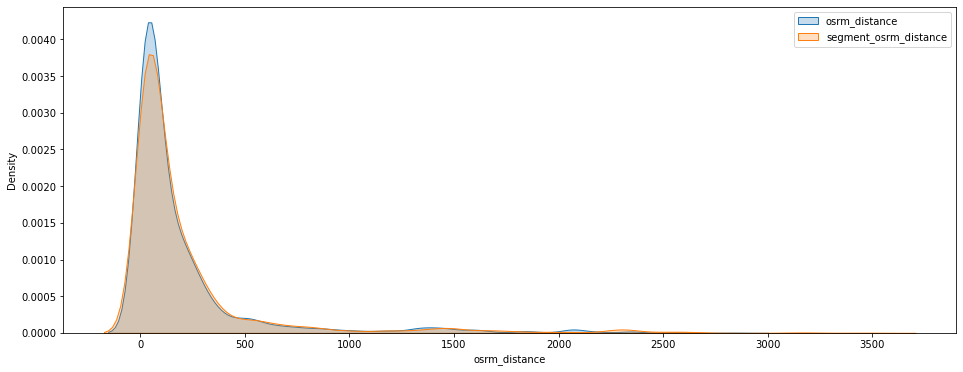

In [ ]:
plt.figure(figsize=(16,6))
sns.kdeplot(data1['osrm_distance'], label = "osrm_distance", fill= True)
sns.kdeplot(data1['segment_osrm_distance'], label = "segment_osrm_distance", fill = True)
plt.legend()
plt.show()

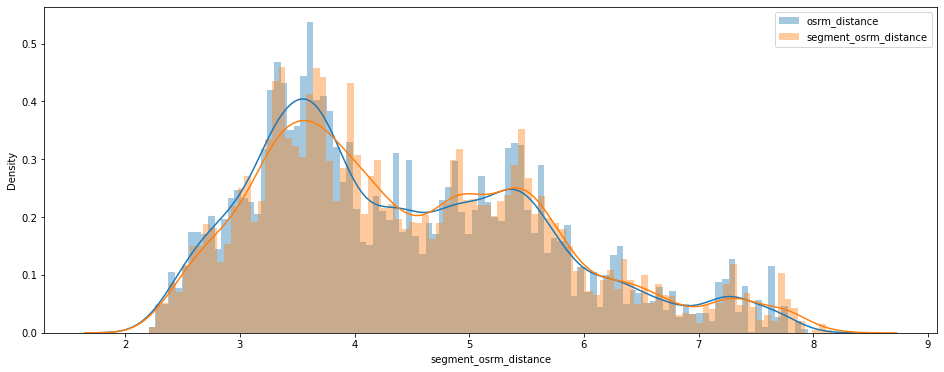

In [ ]:
plt.figure(figsize=(16,6))
sns.distplot(np.log(data1['osrm_distance']), hist=True, kde=True, label = "osrm_distance", bins = 100)
sns.distplot(np.log(data1['segment_osrm_distance']), hist=True, kde=True, label = "segment_osrm_distance", bins = 100)
plt.legend()
plt.show()

In [ ]:
print('\033[1m' + "OSRM Distance Description" + '\033[0m')
print(data1['osrm_distance'].describe())
print('\033[1m' + "-------------------------------------------------------------------------------------------------------------------------" + '\033[0m')
print('\033[1m' + "Segmented OSRM Distance Description" + '\033[0m')
print(data1['segment_osrm_distance'].describe())

OSRM Distance Description
count    14817.000000
mean       204.344689
std        370.395573
min          9.072900
25%         30.819200
50%         65.618800
75%        208.475000
max       2840.081000
Name: osrm_distance, dtype: float64
-------------------------------------------------------------------------------------------------------------------------
Segmented OSRM Distance Description
count    14817.000000
mean       223.201161
std        416.628374
min          9.072900
25%         32.654500
50%         70.154400
75%        218.802400
max       3523.632400
Name: segment_osrm_distance, dtype: float64


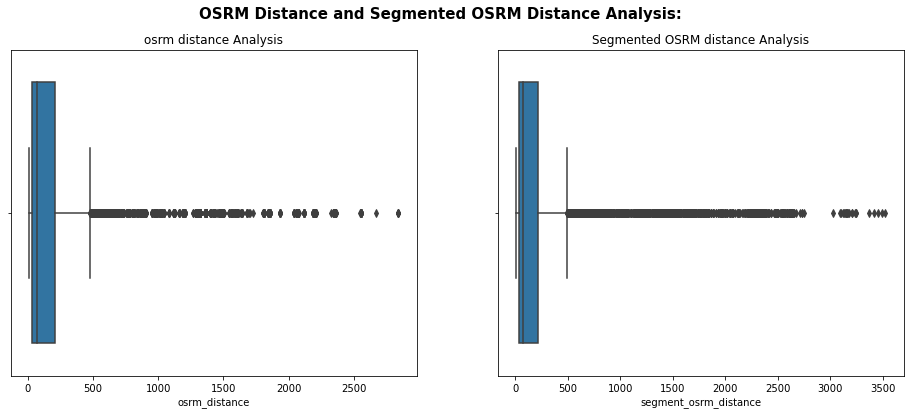

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=False)
suptitle = "OSRM Distance and Segmented OSRM Distance Analysis: "
fig.suptitle(suptitle , fontsize=15, fontweight='bold')
graph = sns.boxplot(x = data1['osrm_distance'], data= data1, dodge = False , ax = axs[0])
title1 = "osrm distance Analysis"
graph.set_title(title1, fontsize = 12)
graph2 = sns.boxplot(x = data1['segment_osrm_distance'], data = data1 , dodge=False, ax = axs[1])
title1 = "Segmented OSRM distance Analysis"
graph2.set_title(title1, fontsize = 12)
plt.show()

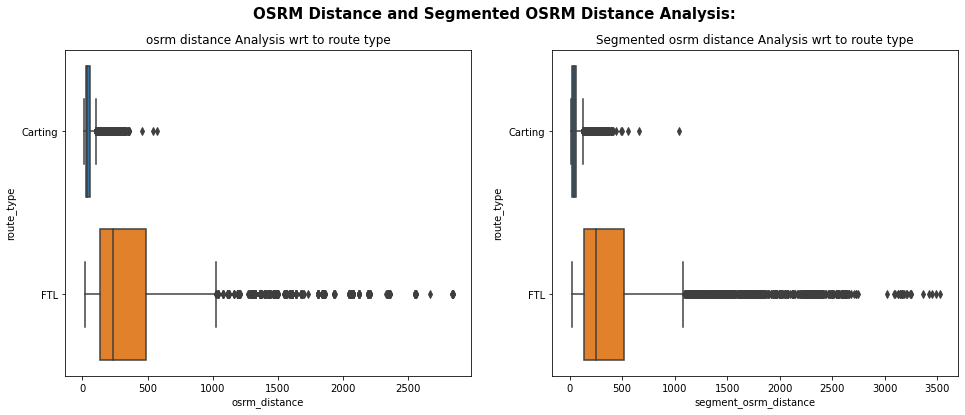

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=False)
suptitle = "OSRM Distance and Segmented OSRM Distance Analysis: "
fig.suptitle(suptitle , fontsize=15, fontweight='bold')
graph = sns.boxplot(x = data1['osrm_distance'],y = data1['route_type'] ,data= data1, dodge = False , ax = axs[0])
title1 = "osrm distance Analysis wrt to route type"
graph.set_title(title1, fontsize = 12)
graph2 = sns.boxplot(x = data1['segment_osrm_distance'],y = data1['route_type'], data = data1 , dodge=False, ax = axs[1])
title1 = "Segmented osrm distance Analysis wrt to route type"
graph2.set_title(title1, fontsize = 12)
plt.show()

For carting IQR range seems very very small as compared ro FTL route_type.
In case of Full truck loading type route OSRM distance has less number of outliers as compared to the segmented osrm Time

In [ ]:
print('\033[1m' + "OSRM Distance Outlier Analysis" + '\033[0m')
print(outlierAnalysis(data1['osrm_distance']))
print('\033[1m' + "-------------------------------------------------------------------------------------------------------------------------" + '\033[0m')
print('\033[1m' + "Segmneted OSRM Distance Outlier Analysis" + '\033[0m')
print(outlierAnalysis(data1['segment_osrm_distance']))

OSRM Distance Outlier Analysis
For the given sample Analysis is as Follows: 
Q1:  30.8192
Q3:  208.475
Mean:  204.34
Median:  65.61880000000001
Mode:  0      13.05
1      13.39
2      13.42
3      13.46
4      13.74
       ...  
78    222.34
79    222.48
80    222.55
81    253.63
82    360.20
Length: 83, dtype: float64
IQR:  177.6558
Maximum Excluding Outlier:  474.9587
Minimum Purchase Excluding Outlier:  -235.6645
None
-------------------------------------------------------------------------------------------------------------------------
Segmneted OSRM Distance Outlier Analysis
For the given sample Analysis is as Follows: 
Q1:  32.6545
Q3:  218.8024
Mean:  223.2
Median:  70.1544
Mode:  0      13.05
1      13.74
2      14.26
3      14.35
4      14.95
       ...  
58     62.81
59     66.97
60     92.91
61    133.37
62    139.98
Length: 63, dtype: float64
IQR:  186.1479
Maximum Excluding Outlier:  498.02425000000005
Minimum Purchase Excluding Outlier:  -246.56735000000003
None


In [ ]:
osrmDistance = data1[(data1['osrm_distance'] <= 474.9587) & (data1['osrm_distance'] >= -235.6645)]["osrm_distance"]
segmentedOsrmDistance = data1[(data1['segment_osrm_distance'] <=498.02425) & (data1['segment_osrm_distance'] >= -246.5673)]['segment_osrm_distance']

In [ ]:
print('\033[1m' + "OSRM Distance Description after outlier treatment" + '\033[0m')
print(osrmDistance.describe())
print('\033[1m' + "-------------------------------------------------------------------------------------------------------------------------" + '\033[0m')
print('\033[1m' + "Segmented OSRM Distance Description after outlier treatment" + '\033[0m')
print(segmentedOsrmDistance.describe())

OSRM Distance Description after outlier treatment
count    13293.000000
mean        99.946388
std         99.290494
min          9.072900
25%         28.971500
50%         51.806300
75%        146.533300
max        474.915800
Name: osrm_distance, dtype: float64
-------------------------------------------------------------------------------------------------------------------------
Segmented OSRM Distance Description after outlier treatment
count    13269.000000
mean       105.981513
std        104.086926
min          9.072900
25%         30.091900
50%         57.115200
75%        153.884300
max        497.855400
Name: segment_osrm_distance, dtype: float64


In [ ]:
osrmDistance = osrmDistance.sample(13269)
osrmDistance.describe()

count    13269.000000
mean       100.006607
std         99.345971
min          9.072900
25%         28.967600
50%         51.877300
75%        146.814500
max        474.915800
Name: osrm_distance, dtype: float64

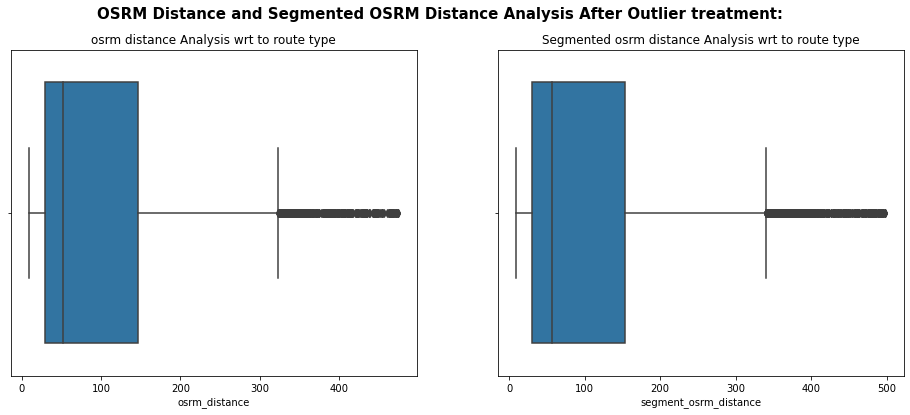

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=False)
suptitle = "OSRM Distance and Segmented OSRM Distance Analysis After Outlier treatment: "
fig.suptitle(suptitle , fontsize=15, fontweight='bold')
graph = sns.boxplot(x = osrmDistance, dodge = False , ax = axs[0])
title1 = "osrm distance Analysis wrt to route type"
graph.set_title(title1, fontsize = 12)
graph2 = sns.boxplot(x = segmentedOsrmDistance, dodge=False, ax = axs[1])
title1 = "Segmented osrm distance Analysis wrt to route type"
graph2.set_title(title1, fontsize = 12)
plt.show()

After outlier treatment we can see the difference in terms for IQR in the above visual analysis

### Kolmogorov-Smirnov(KS) test

In [ ]:
segmentedOsrmDistance.var()/osrmDistance.var()

1.0977206761193108

In [ ]:
stats.ks_2samp(osrmDistance, segmentedOsrmDistance)

KstestResult(statistic=0.04544426859597561, pvalue=2.414165778693322e-12)

### 2 sample T test

In [ ]:
stats.ttest_ind(a=osrmDistance, b=segmentedOsrmDistance, equal_var=True, alternative='greater')

Ttest_indResult(statistic=-4.783282823431487, pvalue=0.9999991330958519)

In [ ]:
stats.ttest_ind(a=osrmDistance, b=segmentedOsrmDistance, equal_var=True, alternative='less')

Ttest_indResult(statistic=-4.783282823431487, pvalue=8.669041481180664e-07)

## 5)	Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

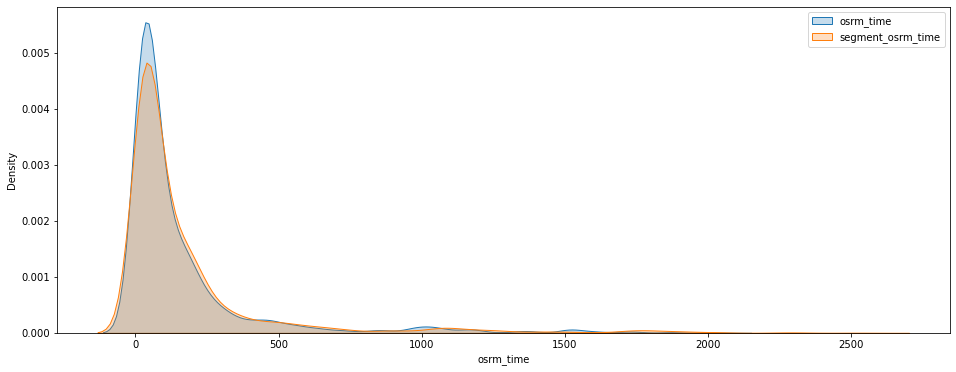

In [ ]:
plt.figure(figsize=(16,6))
sns.kdeplot(data1['osrm_time'], label = "osrm_time", fill= True)
sns.kdeplot(data1['segment_osrm_time'], label = "segment_osrm_time", fill = True)
plt.legend()
plt.show()

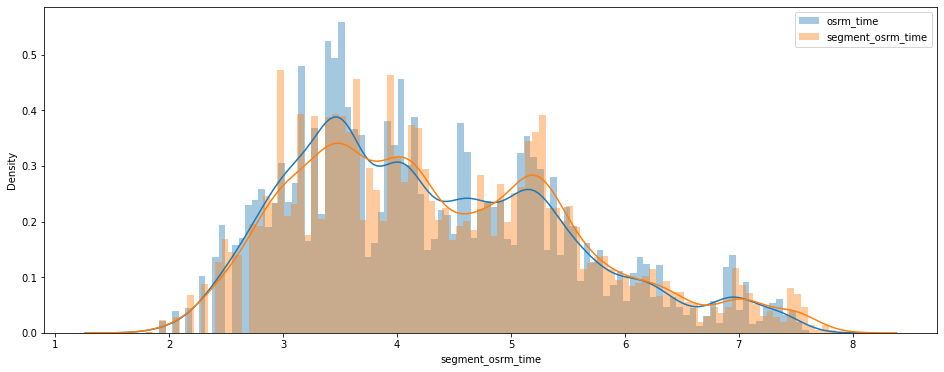

In [ ]:
plt.figure(figsize=(16,6))
sns.distplot(np.log(data1['osrm_time']), hist=True, kde=True, label = "osrm_time", bins = 100)
sns.distplot(np.log(data1['segment_osrm_time']), hist=True, kde=True, label = "segment_osrm_time", bins = 100)
plt.legend()
plt.show()

In [ ]:
print('\033[1m' + "OSRM Time Description" + '\033[0m')
print(data1['osrm_time'].describe())
print('\033[1m' + "-------------------------------------------------------------------------------------------------------------------------" + '\033[0m')
print('\033[1m' + "Segmented OSRM time Description" + '\033[0m')
print(data1['segment_osrm_time'].describe())

OSRM Time Description
count    14817.000000
mean       161.384018
std        271.360995
min          6.000000
25%         29.000000
50%         60.000000
75%        168.000000
max       2032.000000
Name: osrm_time, dtype: float64
-------------------------------------------------------------------------------------------------------------------------
Segmented OSRM time Description
count    14817.000000
mean       180.949787
std        314.542047
min          6.000000
25%         31.000000
50%         65.000000
75%        185.000000
max       2564.000000
Name: segment_osrm_time, dtype: float64


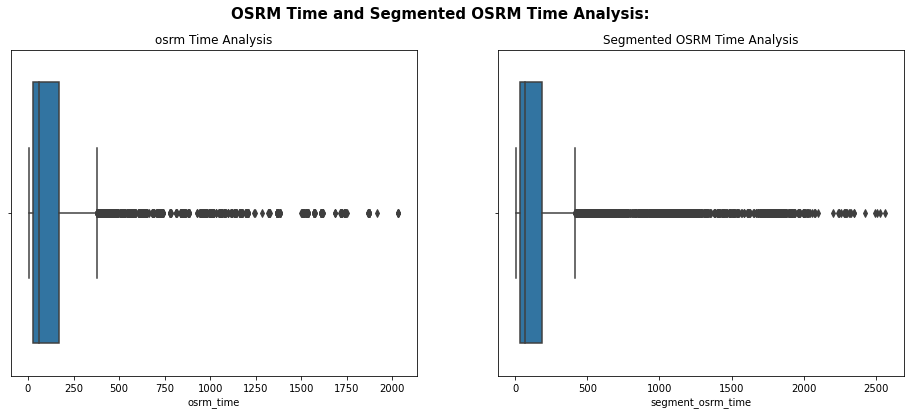

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=False)
suptitle = "OSRM Time and Segmented OSRM Time Analysis: "
fig.suptitle(suptitle , fontsize=15, fontweight='bold')
graph = sns.boxplot(x = data1['osrm_time'], data= data1, dodge = False , ax = axs[0])
title1 = "osrm Time Analysis"
graph.set_title(title1, fontsize = 12)
graph2 = sns.boxplot(x = data1['segment_osrm_time'], data = data1 , dodge=False, ax = axs[1])
title1 = "Segmented OSRM Time Analysis"
graph2.set_title(title1, fontsize = 12)
plt.show()

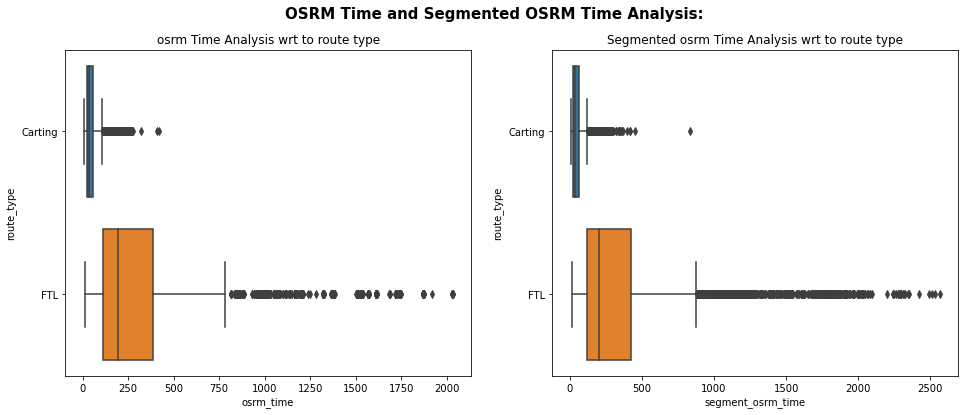

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=False)
suptitle = "OSRM Time and Segmented OSRM Time Analysis: "
fig.suptitle(suptitle , fontsize=15, fontweight='bold')
graph = sns.boxplot(x = data1['osrm_time'],y = data1['route_type'] ,data= data1, dodge = False , ax = axs[0])
title1 = "osrm Time Analysis wrt to route type"
graph.set_title(title1, fontsize = 12)
graph2 = sns.boxplot(x = data1['segment_osrm_time'],y = data1['route_type'], data = data1 , dodge=False, ax = axs[1])
title1 = "Segmented osrm Time Analysis wrt to route type"
graph2.set_title(title1, fontsize = 12)
plt.show()

In [ ]:
print('\033[1m' + "OSRM Time Outlier Analysis" + '\033[0m')
print(outlierAnalysis(data1['osrm_time']))
print('\033[1m' + "-------------------------------------------------------------------------------------------------------------------------" + '\033[0m')
print('\033[1m' + "Segmneted OSRM Time Outlier Analysis" + '\033[0m')
print(outlierAnalysis(data1['segment_osrm_time']))

OSRM Time Outlier Analysis
For the given sample Analysis is as Follows: 
Q1:  29.0
Q3:  168.0
Mean:  161.38
Median:  60.0
Mode:  0    34.0
dtype: float64
IQR:  139.0
Maximum Excluding Outlier:  376.5
Minimum Purchase Excluding Outlier:  -179.5
None
-------------------------------------------------------------------------------------------------------------------------
Segmneted OSRM Time Outlier Analysis
For the given sample Analysis is as Follows: 
Q1:  31.0
Q3:  185.0
Mean:  180.95
Median:  65.0
Mode:  0    17.0
dtype: float64
IQR:  154.0
Maximum Excluding Outlier:  416.0
Minimum Purchase Excluding Outlier:  -200.0
None


In [ ]:
osrmTime = data1[(data1['osrm_time'] <= 376.5 ) & (data1['osrm_time'] >= -179.5)]['osrm_time']
segementedOsrmTime = data1[(data1['segment_osrm_time'] <= 416 ) & (data1['segment_osrm_time'] >= -200)]['segment_osrm_time']

In [ ]:
print('\033[1m' + "OSRM Time Description after outlier treatment" + '\033[0m')
print(osrmTime.describe())
print('\033[1m' + "-------------------------------------------------------------------------------------------------------------------------" + '\033[0m')
print('\033[1m' + "Segmented OSRM time Description after outlier treatment" + '\033[0m')
print(segementedOsrmTime.describe())

OSRM Time Description after outlier treatment
count    13300.000000
mean        85.034436
std         79.828557
min          6.000000
25%         28.000000
50%         52.000000
75%        121.000000
max        376.000000
Name: osrm_time, dtype: float64
-------------------------------------------------------------------------------------------------------------------------
Segmented OSRM time Description after outlier treatment
count    13325.000000
mean        93.666417
std         88.797506
min          6.000000
25%         28.000000
50%         56.000000
75%        140.000000
max        416.000000
Name: segment_osrm_time, dtype: float64


In [ ]:
segementedOsrmTime = segementedOsrmTime.sample(13300)
segementedOsrmTime.describe()

count    13300.000000
mean        93.670150
std         88.823223
min          6.000000
25%         28.000000
50%         56.000000
75%        140.000000
max        416.000000
Name: segment_osrm_time, dtype: float64

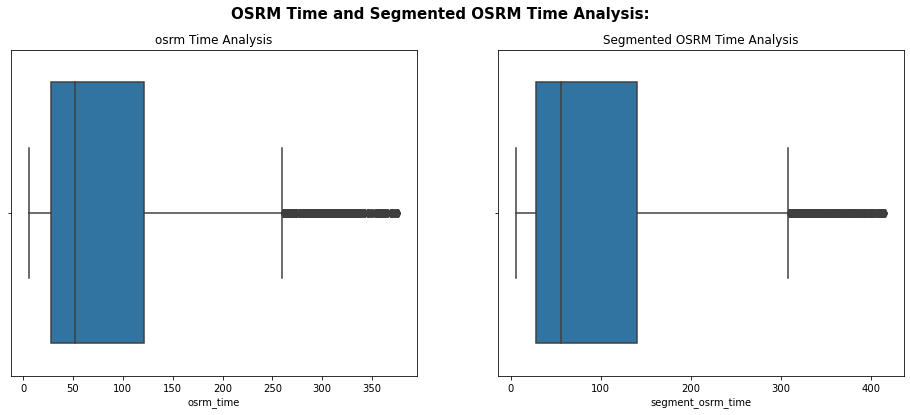

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=False)
suptitle = "OSRM Time and Segmented OSRM Time Analysis: "
fig.suptitle(suptitle , fontsize=15, fontweight='bold')
graph = sns.boxplot(x = osrmTime,dodge = False , ax = axs[0])
title1 = "osrm Time Analysis"
graph.set_title(title1, fontsize = 12)
graph2 = sns.boxplot(x =segementedOsrmTime , dodge=False, ax = axs[1])
title1 = "Segmented OSRM Time Analysis"
graph2.set_title(title1, fontsize = 12)
plt.show()

### Kolmogorov-Smirnov(KS) test

In [ ]:
stats.ks_2samp(osrmTime, segementedOsrmTime)

KstestResult(statistic=0.041203007518796964, pvalue=3.017703201205871e-10)

In [ ]:
stats.ttest_ind(a=osrmTime, b=segementedOsrmTime, equal_var=True)

Ttest_indResult(statistic=-8.339334236143506, pvalue=7.827985123115609e-17)

In [ ]:
data1.columns

Index(['trip_uuid', 'trip_creation_time', 'source_center',
       'destination_center', 'route_type', 'source_name', 'od_start_time',
       'destination_name', 'od_end_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'data', 'source_city', 'source_place',
       'source_code', 'source_state', 'destination_city', 'destination_place',
       'destination_code', 'destination_state', 'month', 'year', 'hour', 'day',
       'Od_Start_End_Diff', 'OdStartEnd_StartScanToEnd'],
      dtype='object')

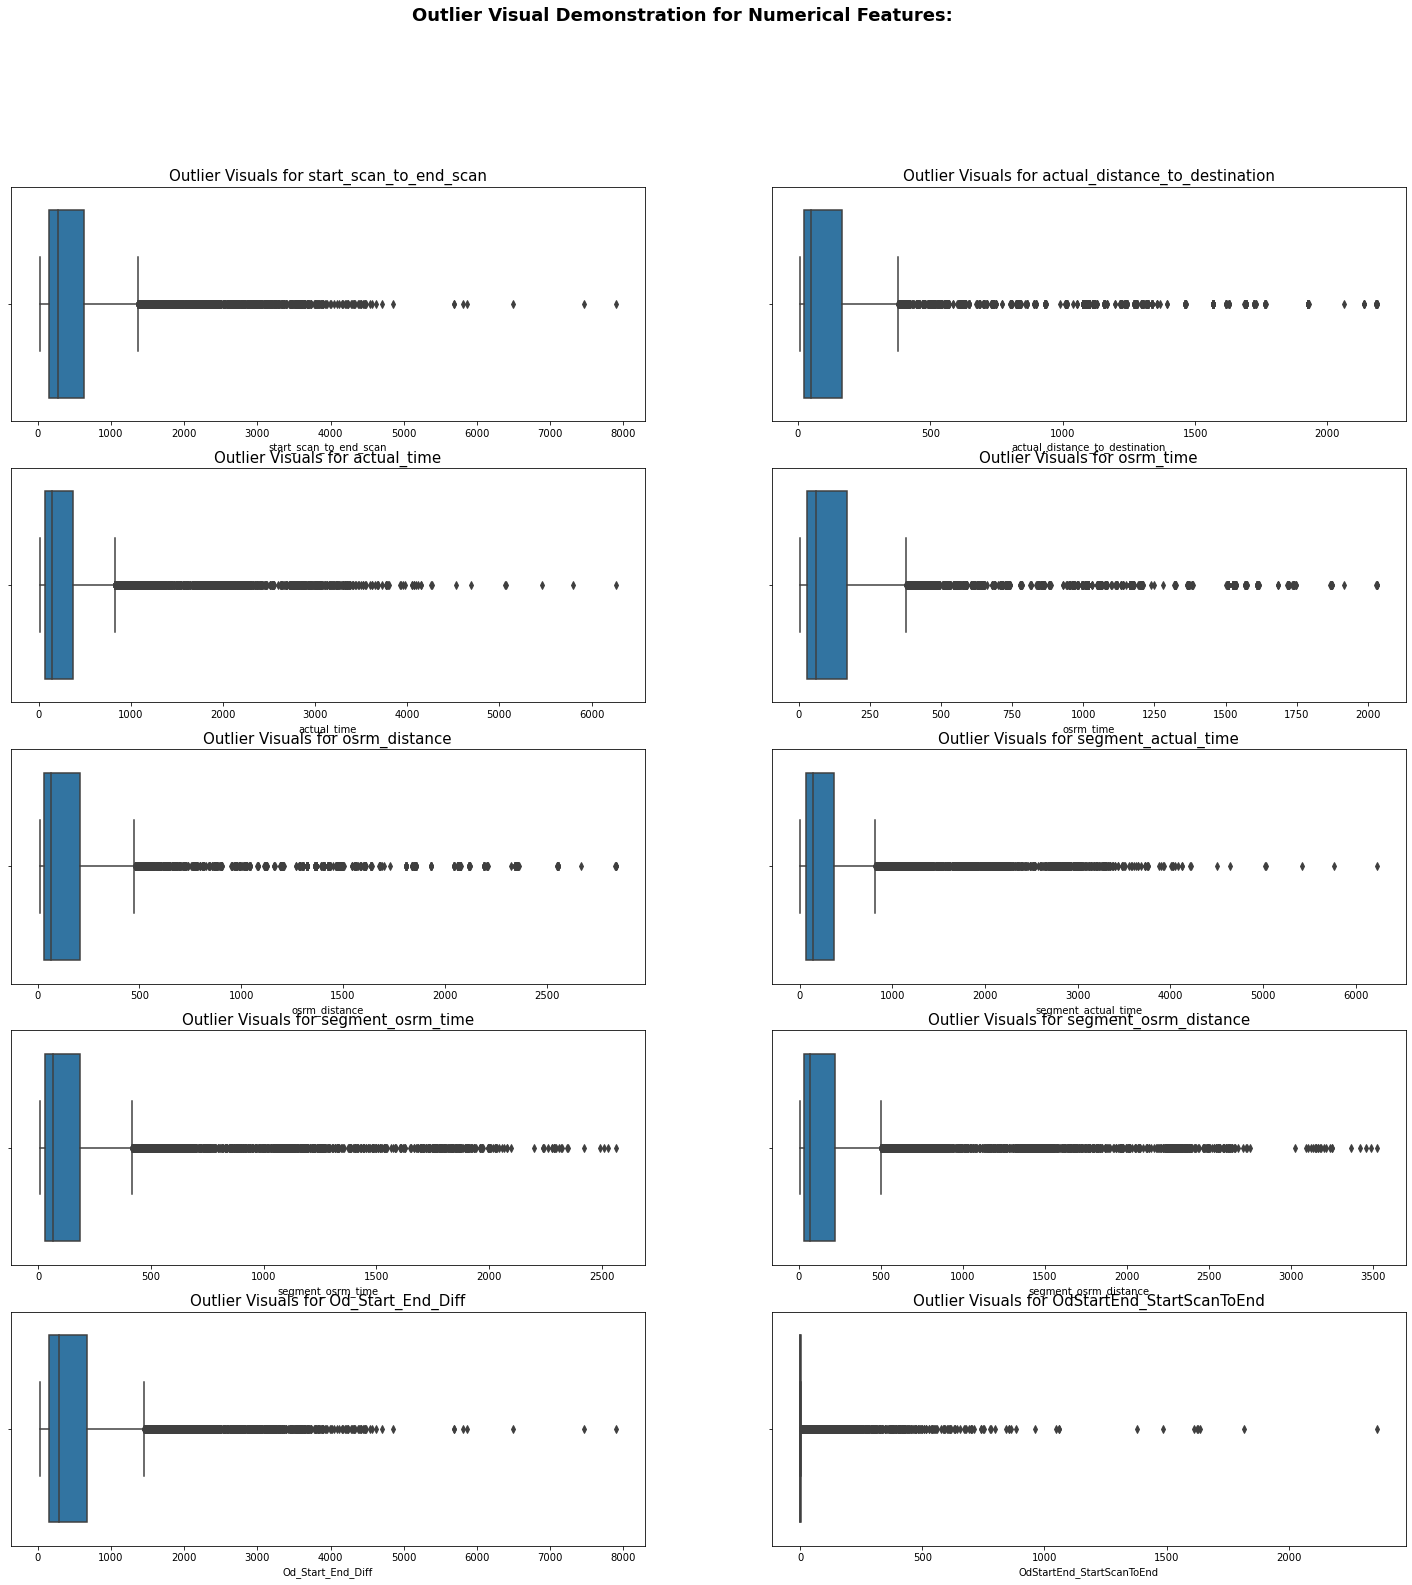

In [ ]:
fig, axs = plt.subplots(5, 2, figsize=(25, 25), sharey=False)
suptitle = "Outlier Visual Demonstration for Numerical Features: "
fig.suptitle(suptitle , fontsize=18, fontweight='bold')
graph = sns.boxplot(x = data1['start_scan_to_end_scan'],dodge = False , ax = axs[0, 0])
title1 = "Outlier Visuals for start_scan_to_end_scan"
graph.set_title(title1, fontsize = 15)
graph2 = sns.boxplot(x = data1['actual_distance_to_destination'] ,dodge=False, ax = axs[0, 1])
title1 = "Outlier Visuals for actual_distance_to_destination"
graph2.set_title(title1, fontsize = 15)
graph3 = sns.boxplot(x = data1["actual_time"],dodge=False, ax = axs[1, 0])
title1 = "Outlier Visuals for actual_time"
graph3.set_title(title1, fontsize = 15)
graph4 = sns.boxplot(x = data1['osrm_time'], dodge = False , ax = axs[1,1])
title1 =  "Outlier Visuals for osrm_time"
graph4.set_title(title1, fontsize = 15)
graph5 = sns.boxplot(x = data1['osrm_distance'] , dodge=False, ax = axs[2, 0])
title1 =  "Outlier Visuals for osrm_distance"
graph5.set_title(title1, fontsize = 15)
graph6 = sns.boxplot(x = data1['segment_actual_time'], dodge=False, ax = axs[2, 1])
title1 = "Outlier Visuals for segment_actual_time"
graph6.set_title(title1, fontsize = 15)
graph7 = sns.boxplot(x = data1['segment_osrm_time'], dodge=False, ax = axs[3, 0])
title1 = "Outlier Visuals for segment_osrm_time"
graph7.set_title(title1, fontsize = 15)
graph8 = sns.boxplot(x = data1['segment_osrm_distance'], dodge=False, ax = axs[3, 1])
title1 ="Outlier Visuals for segment_osrm_distance"
graph8.set_title(title1, fontsize = 15)
graph9 = sns.boxplot(x = data1['Od_Start_End_Diff'], dodge=False, ax = axs[4, 0])
title1 = "Outlier Visuals for Od_Start_End_Diff"
graph9.set_title(title1, fontsize = 15)
graph10 = sns.boxplot(x = data1['OdStartEnd_StartScanToEnd'], dodge=False, ax = axs[4, 1])
title1 ="Outlier Visuals for OdStartEnd_StartScanToEnd"
graph10.set_title(title1, fontsize = 15)
plt.show()

In [ ]:
print('\033[1m' + "start_scan_to_end_scan Outlier Analysis" + '\033[0m')
print(outlierAnalysis(data1['start_scan_to_end_scan']))
print('\033[1m' + "-------------------------------------------------------------------------------------------------------------------------" + '\033[0m')
print('\033[1m' + "actual_distance_to_destination Outlier Analysis" + '\033[0m')
print(outlierAnalysis(data1['actual_distance_to_destination']))
print('\033[1m' + "-------------------------------------------------------------------------------------------------------------------------" + '\033[0m')
print('\033[1m' + "actual_time Outlier Analysis" + '\033[0m')
print(outlierAnalysis(data1['actual_time']))
print('\033[1m' + "-------------------------------------------------------------------------------------------------------------------------" + '\033[0m')
print('\033[1m' + "osrm_time Outlier Analysis" + '\033[0m')
print(outlierAnalysis(data1['osrm_time']))
print('\033[1m' + "-------------------------------------------------------------------------------------------------------------------------" + '\033[0m')
print('\033[1m' + "osrm_distance Outlier Analysis" + '\033[0m')
print(outlierAnalysis(data1['osrm_distance']))
print('\033[1m' + "-------------------------------------------------------------------------------------------------------------------------" + '\033[0m')
print('\033[1m' + "segment_actual_time Outlier Analysis" + '\033[0m')
print(outlierAnalysis(data1['segment_actual_time']))
print('\033[1m' + "-------------------------------------------------------------------------------------------------------------------------" + '\033[0m')
print('\033[1m' + "segment_osrm_time Outlier Analysis" + '\033[0m')
print(outlierAnalysis(data1['segment_osrm_time']))
print('\033[1m' + "-------------------------------------------------------------------------------------------------------------------------" + '\033[0m')
print('\033[1m' + "actual_distance_to_destination Outlier Analysis" + '\033[0m')
print(outlierAnalysis(data1['actual_distance_to_destination']))
print('\033[1m' + "-------------------------------------------------------------------------------------------------------------------------" + '\033[0m')
print('\033[1m' + "Od_Start_End_Diff Outlier Analysis" + '\033[0m')
print(outlierAnalysis(data1['Od_Start_End_Diff']))
print('\033[1m' + "-------------------------------------------------------------------------------------------------------------------------" + '\033[0m')
print('\033[1m' + "OdStartEnd_StartScanToEnd Outlier Analysis" + '\033[0m')
print(outlierAnalysis(data1['OdStartEnd_StartScanToEnd']))
print('\033[1m' + "-------------------------------------------------------------------------------------------------------------------------" + '\033[0m')


start_scan_to_end_scan Outlier Analysis
For the given sample Analysis is as Follows: 
Q1:  149.0
Q3:  637.0
Mean:  530.78
Median:  280.0
Mode:  0    115.0
1    148.0
dtype: float64
IQR:  488.0
Maximum Excluding Outlier:  1369.0
Minimum Purchase Excluding Outlier:  -583.0
None
-------------------------------------------------------------------------------------------------------------------------
actual_distance_to_destination Outlier Analysis
For the given sample Analysis is as Follows: 
Q1:  22.83723905859321
Q3:  164.58320763841138
Mean:  164.48
Median:  48.47407210275264
Mode:  0      15.19
1      15.81
2      17.48
3      18.04
4      22.63
5      23.03
6      23.85
7      25.14
8      25.24
9      25.88
10     26.58
11     27.96
12     32.18
13    195.56
14    195.59
15    195.62
dtype: float64
IQR:  141.74596857981817
Maximum Excluding Outlier:  377.2021605081386
Minimum Purchase Excluding Outlier:  -189.78171381113404
None
--------------------------------------------------------

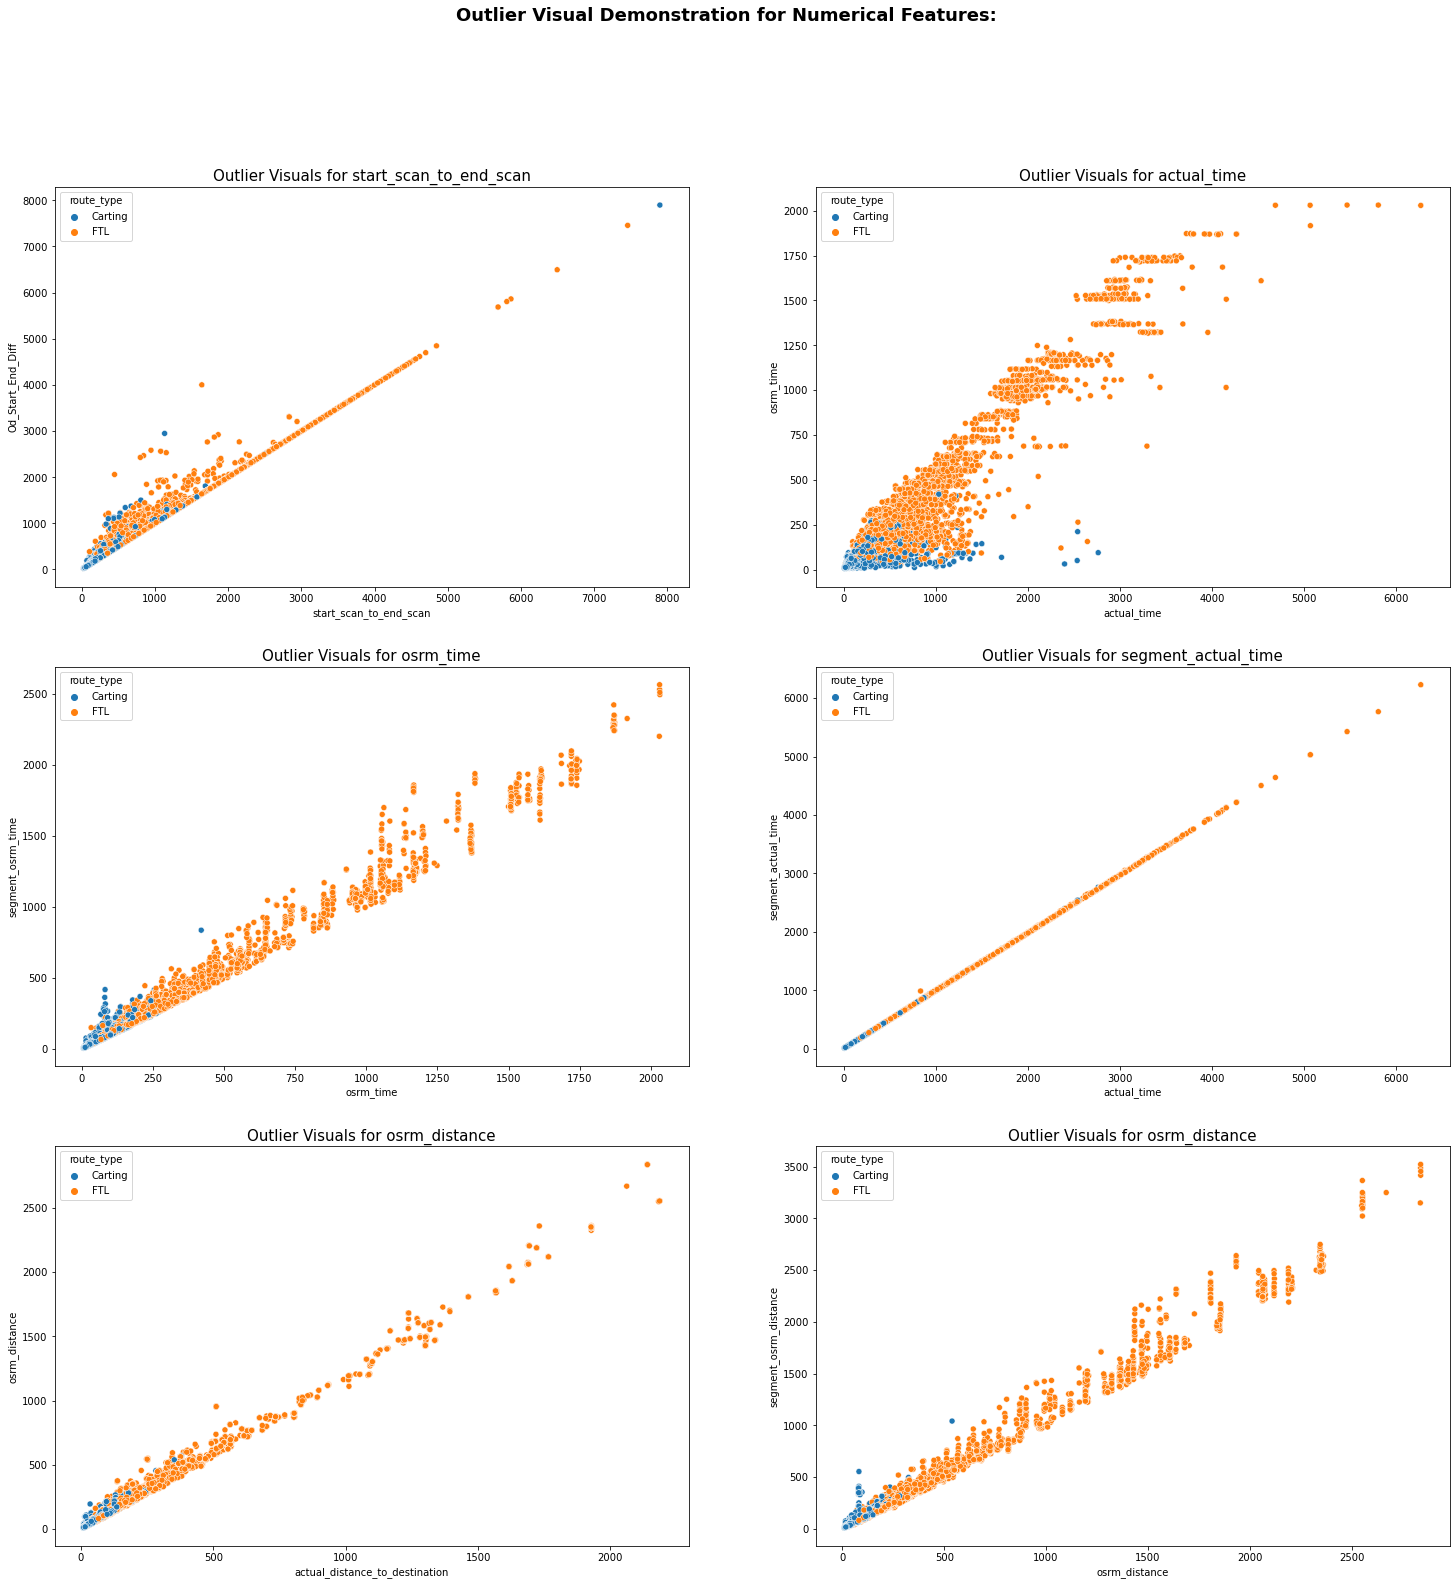

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(25, 25), sharey=False)
suptitle = "Outlier Visual Demonstration for Numerical Features: "
fig.suptitle(suptitle , fontsize=18, fontweight='bold')
graph = sns.scatterplot(x = data1['start_scan_to_end_scan'], y = data1['Od_Start_End_Diff'], hue = data1['route_type'] , ax = axs[0, 0])
title1 = "Outlier Visuals for start_scan_to_end_scan"
graph.set_title(title1, fontsize = 15)
graph3 = sns.scatterplot(x = data1["actual_time"], y = data1['osrm_time'], hue = data1['route_type'], ax = axs[0, 1])
title1 = "Outlier Visuals for actual_time"
graph3.set_title(title1, fontsize = 15)
graph4 = sns.scatterplot(x = data1['osrm_time'],y = data1['segment_osrm_time'],hue = data1['route_type'] , ax = axs[1,0])
title1 =  "Outlier Visuals for osrm_time"
graph4.set_title(title1, fontsize = 15)
graph6 = sns.scatterplot(x = data1['actual_time'],y = data1['segment_actual_time'],hue = data1['route_type'], ax = axs[1, 1])
title1 = "Outlier Visuals for segment_actual_time"
graph6.set_title(title1, fontsize = 15)
graph5 = sns.scatterplot(x = data1['actual_distance_to_destination'], y = data1['osrm_distance'],hue = data1['route_type'],ax = axs[2, 0])
title1 =  "Outlier Visuals for osrm_distance"
graph5.set_title(title1, fontsize = 15)
graph6 = sns.scatterplot(x = data1['osrm_distance'], y = data1['segment_osrm_distance'],hue = data1['route_type'],ax = axs[2, 1])
title1 =  "Outlier Visuals for osrm_distance"
graph6.set_title(title1, fontsize = 15)
plt.show()

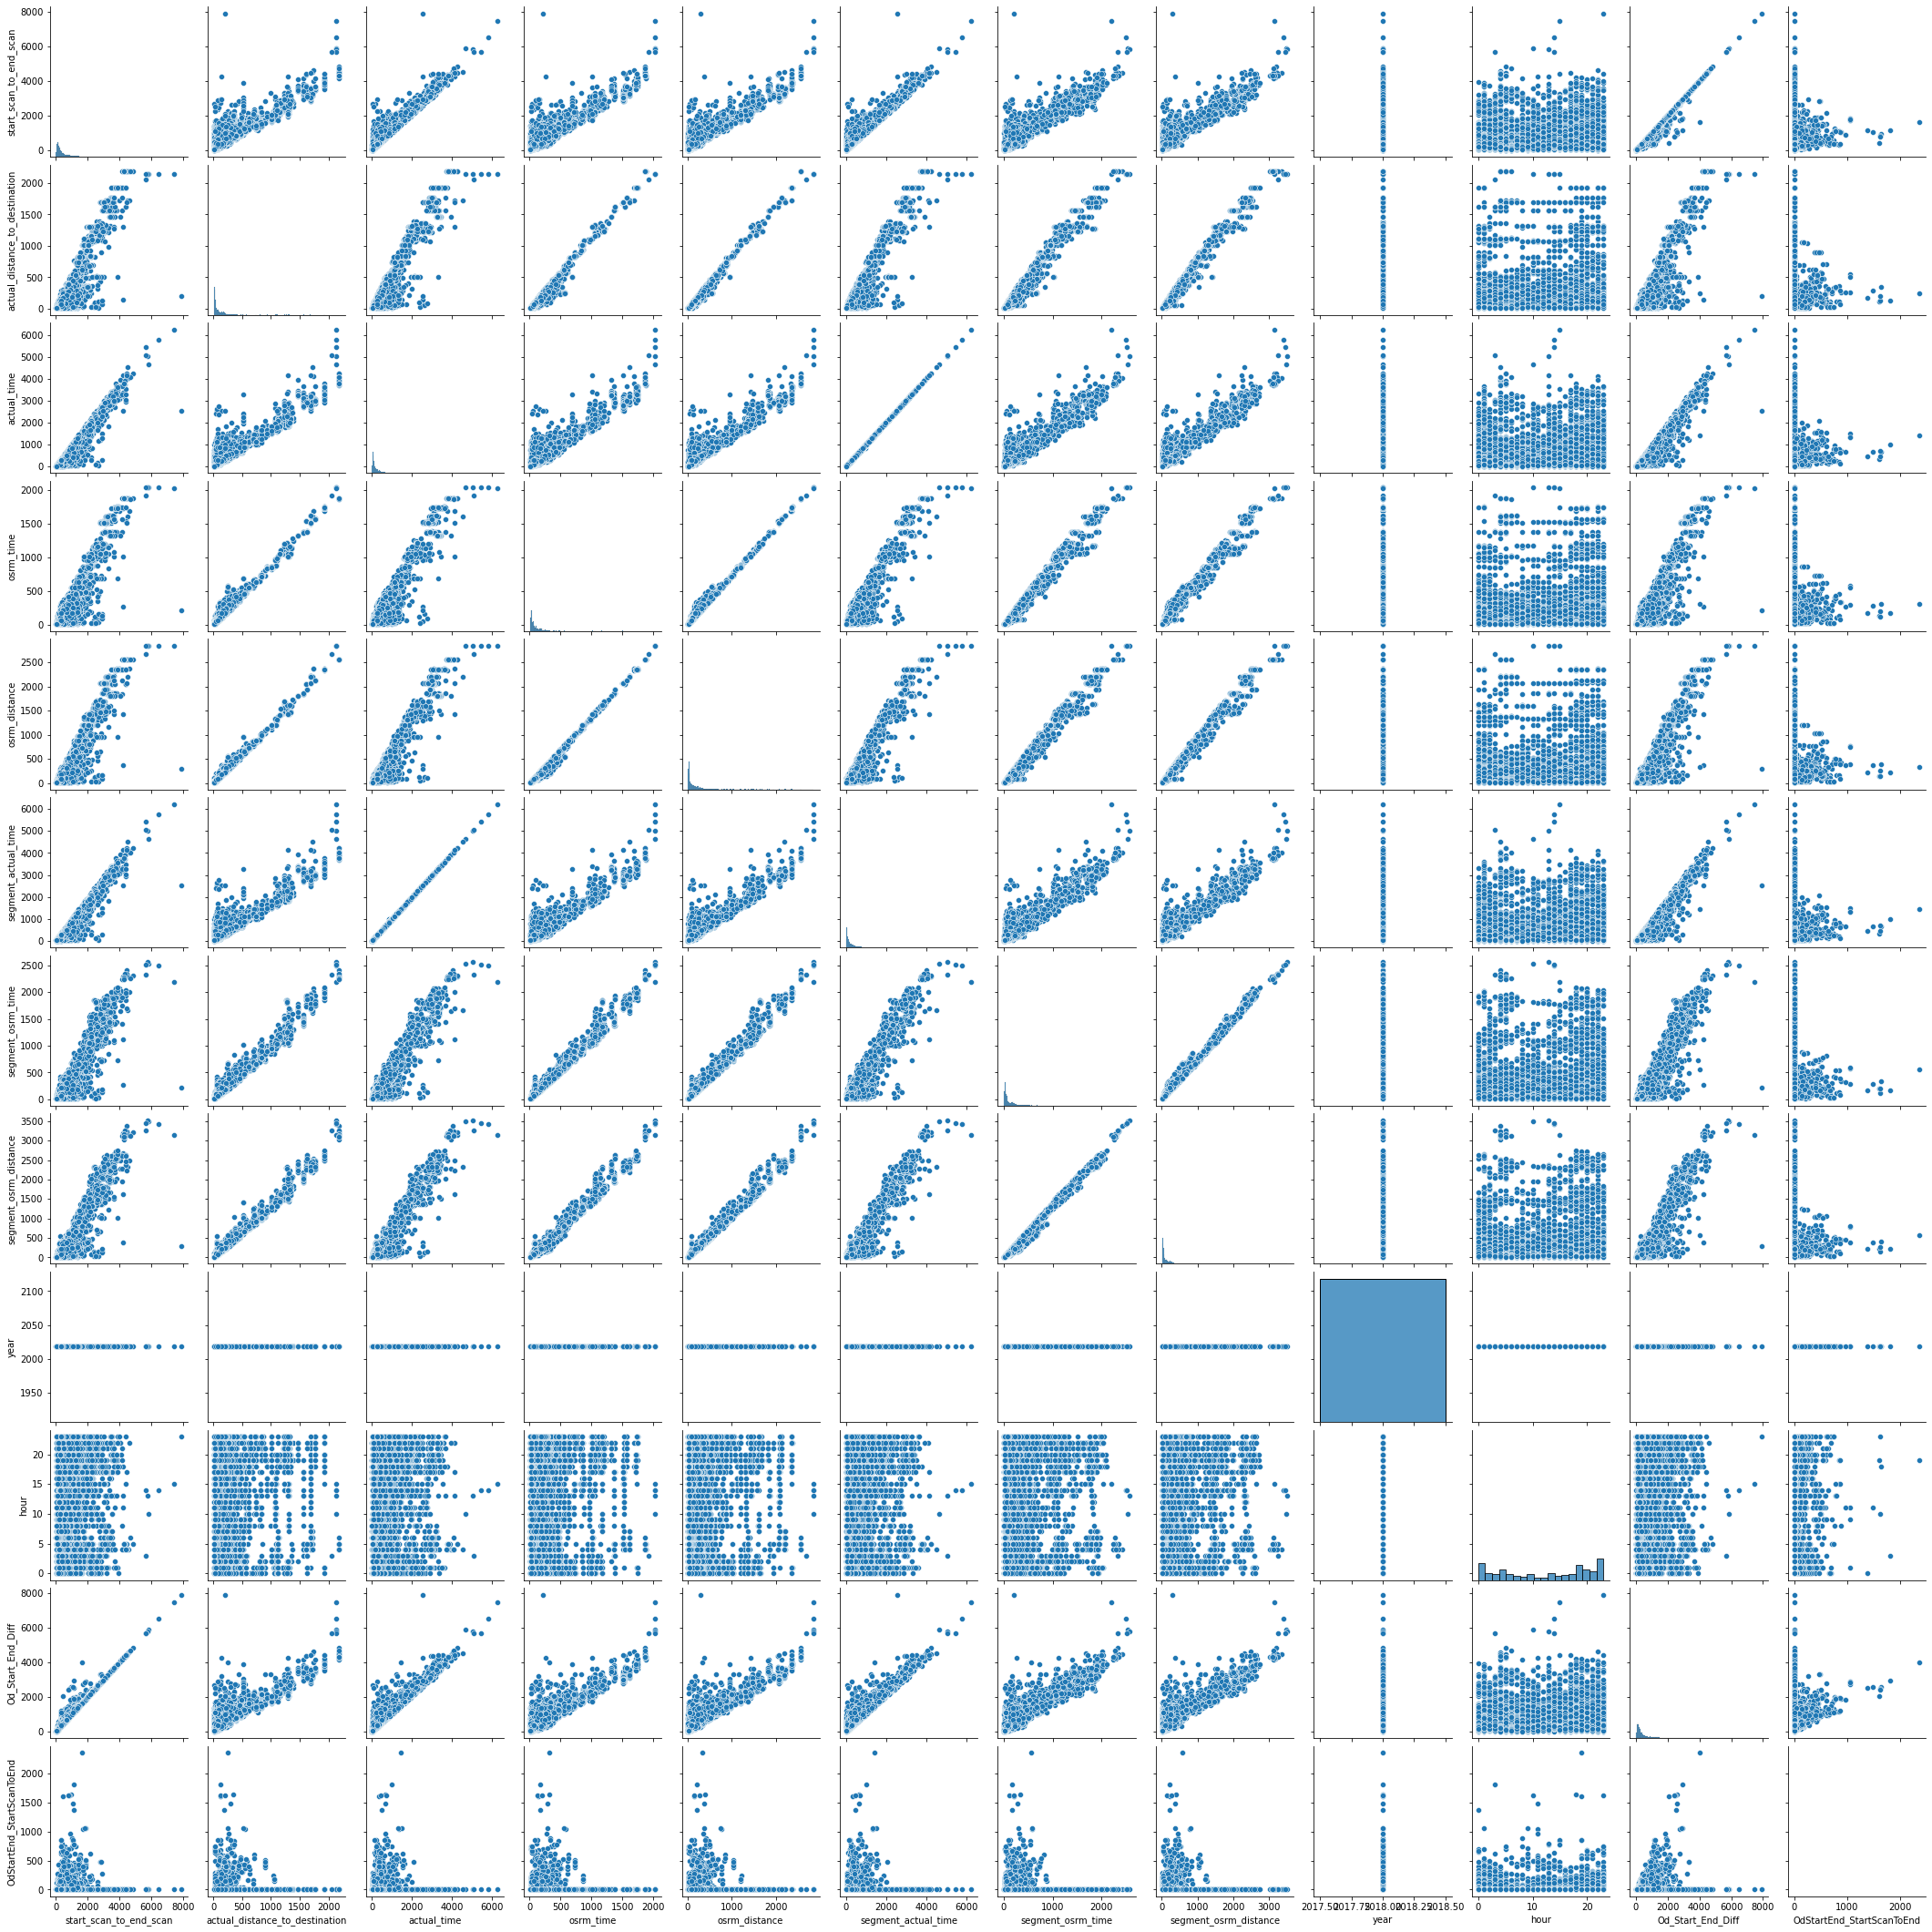

In [ ]:
sns.pairplot(data1)

In [ ]:
data1.year.value_counts()

2018    14817
Name: year, dtype: int64

In [ ]:
data1.month.value_counts()

September    13029
October       1788
Name: month, dtype: int64

In [ ]:
data1.month.value_counts()/len(data1) * 100

September    87.93278
October      12.06722
Name: month, dtype: float64

In [ ]:
data1.day.value_counts()/len(data1) * 100

Wednesday    18.485523
Saturday     14.375380
Thursday     14.213404
Friday       13.902949
Tuesday      13.767969
Monday       13.410272
Sunday       11.844503
Name: day, dtype: float64

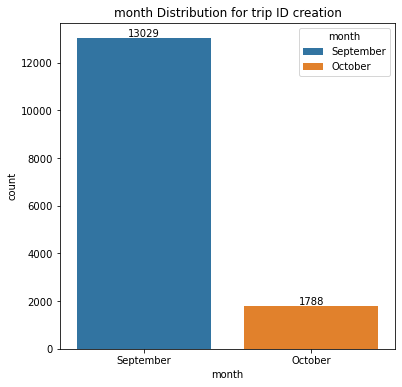

In [ ]:
plt.figure(figsize=(6,6))
graph = sns.countplot(x = 'month', hue= 'month', data= data1, dodge = False)
for i in graph.containers:
    graph.bar_label(i,)
graph.set_title("month Distribution for trip ID creation", fontsize = 12)
plt.show()


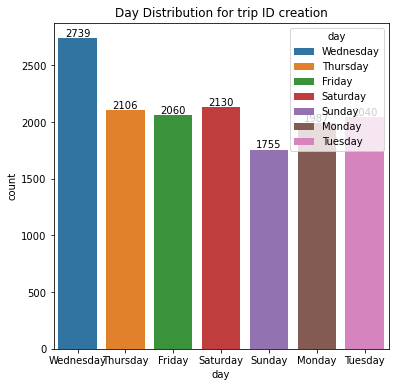

In [ ]:
plt.figure(figsize=(6,6))
graph = sns.countplot(x = 'day', hue= 'day', data= data1, dodge = False)
for i in graph.containers:
    graph.bar_label(i,)
graph.set_title("Day Distribution for trip ID creation", fontsize = 12)
plt.show()

In [ ]:
data1.hour.value_counts()/len(data1) * 100

22    7.592630
23    7.471148
20    7.302423
0     6.708510
21    5.891881
19    5.648917
1     5.061753
2     4.737801
18    4.710805
3     4.400351
4     4.292367
6     4.123642
17    4.015658
16    3.549976
5     3.435243
7     3.192279
15    3.165283
14    2.557873
8     2.335156
13    2.220422
9     2.186677
12    1.828980
11    1.801984
10    1.768239
Name: hour, dtype: float64

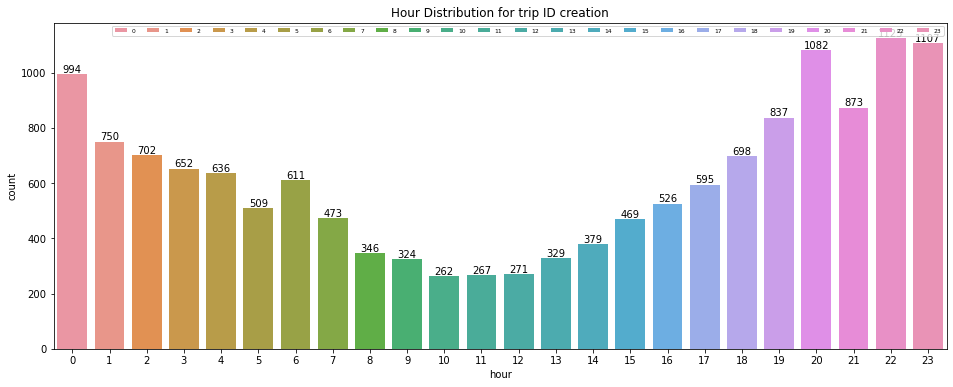

In [ ]:
plt.figure(figsize=(16,6))
graph = sns.countplot(x = 'hour', hue= 'hour', data= data1, dodge = False)
for i in graph.containers:
    graph.bar_label(i,)
graph.set_title("Hour Distribution for trip ID creation", fontsize = 12)
plt.legend(ncol=24, loc="upper right", fontsize = 6)
plt.show()

In [ ]:
data1.source_state.value_counts()

Maharashtra               2682
Karnataka                 2229
Haryana                   1694
Tamil Nadu                1085
Delhi                      793
Telangana                  780
Gujarat                    746
Uttar Pradesh              721
West Bengal                677
Punjab                     630
Rajasthan                  493
Andhra Pradesh             407
Bihar                      358
Madhya Pradesh             332
Kerala                     289
Assam                      273
Jharkhand                  160
Uttarakhand                114
Orissa                     107
Goa                         65
Chandigarh                  48
Chhattisgarh                43
Himachal Pradesh            34
Jammu & Kashmir             17
Dadra and Nagar Haveli      15
Pondicherry                 12
Nagaland                     5
Arunachal Pradesh            4
Mizoram                      4
Name: source_state, dtype: int64

In [ ]:
sourceStates = pd.DataFrame((data1.source_state.value_counts()/len(data1) * 100)[:7])

In [ ]:
sourceStates.reset_index(inplace=True)

In [ ]:
sourceStates.columns = ['Source_state', 'Percentage']

In [ ]:
sourceStates

,Source_state,Percentage
0,Maharashtra,18.100830
1,Karnataka,15.043531
2,Haryana,11.432814
3,Tamil Nadu,7.322670
4,Delhi,5.351961
5,Telangana,5.264224
6,Gujarat,5.034757


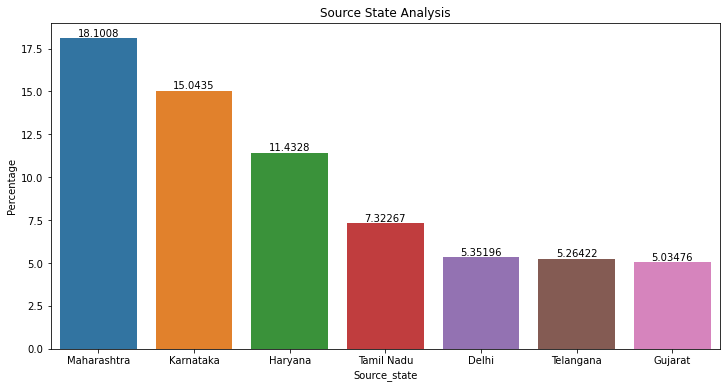

In [ ]:
plt.figure(figsize=(12,6))
graph = sns.barplot(x = 'Source_state',y = 'Percentage', data= sourceStates, dodge = False)
for i in graph.containers:
    graph.bar_label(i,)
graph.set_title("Source State Analysis", fontsize = 12)
plt.show()


In [ ]:
source_cities = pd.DataFrame((data1.source_city.value_counts()/len(data1)* 100)[:10])
source_cities.reset_index(inplace=True)
source_cities.columns = ['Source_City', 'Percentage']
source_cities

,Source_City,Percentage
0,Gurgaon,6.978471
1,Bengaluru,6.850240
2,Bhiwandi,5.473443
3,Bangalore,5.095498
4,Delhi,4.184383
5,Mumbai,3.907674
6,Hyderabad,3.792941
7,Pune,3.003307
8,Chandigarh,2.814335
9,Kolkata,2.287913


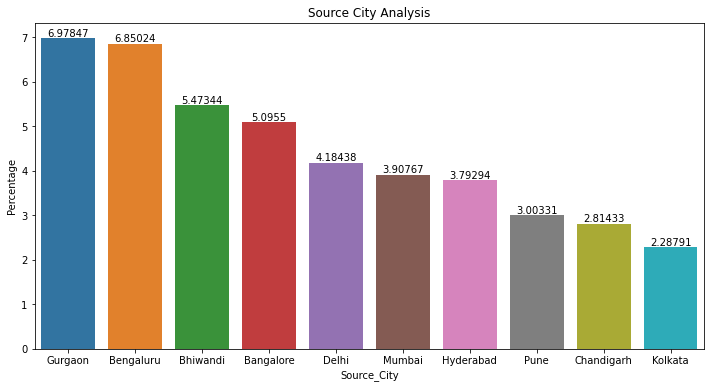

In [ ]:
plt.figure(figsize=(12,6))
graph = sns.barplot(x = 'Source_City',y = 'Percentage', data= source_cities, dodge = False)
for i in graph.containers:
    graph.bar_label(i,)
graph.set_title("Source City Analysis", fontsize = 12)
plt.show()

Top 10 Cities From where deliveries are coming are Gurgaon, Bengluru, Bhiwandi, Bangalore, Delhi, Mumbai, Hydrabad, Pune, Chandigarh and Kolkata. Aound 45 percent of total deliveries are coming from theses 10 cities

In [ ]:
data3 = data1.groupby(['source_state', "source_city"]).aggregate('source_city').count()

In [ ]:
top_7_source_states = ['Maharashtra', 'Karnataka', 'Haryana', 'Tamil Nadu', 'Delhi', 'Telangana', 'Gujarat']
for x in top_7_source_states:
    print('\033[1m' +"Top 5 Cities for state:"+ x + '\033[0m')
    print(data3.loc[x].sort_values(ascending = False)[:5] / len(data1[data1['source_state'] == x]) * 100)
    print('\033[1m' +"-------------------------------------------------------" +'\033[0m')

Top 5 Cities for state:Maharashtra
source_city
Bhiwandi       30.238628
Mumbai         21.588367
Pune           16.592095
Mumbai Hub     11.185682
LowerParel      2.423565
Name: source_city, dtype: float64
-------------------------------------------------------
Top 5 Cities for state:Karnataka
source_city
Bengaluru         45.536115
Bangalore         33.871691
HBR Layout PC      3.544190
Gulbarga           2.691790
Hubli              2.646927
Name: source_city, dtype: float64
-------------------------------------------------------
Top 5 Cities for state:Haryana
source_city
Gurgaon      61.038961
Sonipat      17.060213
FBD           9.976387
Hisar         3.128689
Faridabad     1.889020
Name: source_city, dtype: float64
-------------------------------------------------------
Top 5 Cities for state:Tamil Nadu
source_city
Chennai        29.124424
MAA            27.649770
Coimbatore      6.451613
Tirunelveli     3.594470
Vellore         2.580645
Name: source_city, dtype: float64
----------

Out of total orders from maharashtra 30 % of orders are sourced from Bhiwandi, 21 % from Mumbai and 16% from pune
For Karnataka 45% orders are sourced from Bengaluru and 33 % sourced from Banglore
From total orders from Haryana around 61 % orders are sourced from Gurgaon

In [ ]:
data4 = data1.groupby(['source_state', "source_center"]).aggregate('trip_uuid').count()

In [ ]:
top_7_source_states = ['Maharashtra', 'Karnataka', 'Haryana', 'Tamil Nadu', 'Delhi', 'Telangana', 'Gujarat']
for x in top_7_source_states:
    print('\033[1m' +"Top 5 Source Centers for State:"+ x + '\033[0m')
    print(data4.loc[x].sort_values(ascending = False)[:5] / len(data1[data1['source_state'] == x]) * 100)
    print('\033[1m' +"-------------------------------------------------------" +'\033[0m')

Top 5 Source Centers for State:Maharashtra
source_center
IND421302AAG    30.238628
IND411033AAA    13.460104
IND400072AAB    11.185682
IND400072AAD     3.691275
IND000000AFT     2.759135
Name: trip_uuid, dtype: float64
-------------------------------------------------------
Top 5 Source Centers for State:Karnataka
source_center
IND562132AAA    32.794975
IND560099AAB    19.111709
IND560300AAA    14.849708
IND560043AAC     3.544190
IND585104AAA     2.691790
Name: trip_uuid, dtype: float64
-------------------------------------------------------
Top 5 Source Centers for State:Haryana
source_center
IND000000ACB    55.962220
IND131028AAB    13.577332
IND121004AAB     9.976387
IND131021AAA     3.423849
IND122004AAA     2.597403
Name: trip_uuid, dtype: float64
-------------------------------------------------------
Top 5 Source Centers for State:Tamil Nadu
source_center
IND600056AAB    27.649770
IND600032AAB    11.059908
IND641062AAD     5.898618
IND600044AAD     4.239631
IND627005AAA     3.59

In [ ]:
for x in top_7_source_states:
    val = round(len(data1.loc[data1.source_state == x]) / len(data1) * 100, 2)
    print('\033[1m' +"Source State: "+ x + " Engaged with " + str(val) + " % of total sample trips"+'\033[0m')
    destinationStateEachSourceState = list(pd.DataFrame((data1[data1.source_state == x]['destination_state'].value_counts())[:5]).reset_index()['index'])
    for y in destinationStateEachSourceState:
        value = round(len(data1[(data1.source_state == x) & (data1.destination_state == y)]) / len(data1.loc[data1.source_state == x]) * 100, 2)
        print("Destination State: "+ y +" Engaged for " + str(value) + " % of trips from this Source State " +'\033[0m')

Source State: Maharashtra Engaged with 18.1 % of total sample trips
Destination State: Maharashtra Engaged for 89.71 % of trips from this Source State 
Destination State: Telangana Engaged for 1.94 % of trips from this Source State 
Destination State: Haryana Engaged for 1.64 % of trips from this Source State 
Destination State: Gujarat Engaged for 1.23 % of trips from this Source State 
Destination State: Karnataka Engaged for 1.23 % of trips from this Source State 
Source State: Karnataka Engaged with 15.04 % of total sample trips
Destination State: Karnataka Engaged for 90.4 % of trips from this Source State 
Destination State: Telangana Engaged for 2.29 % of trips from this Source State 
Destination State: Haryana Engaged for 1.7 % of trips from this Source State 
Destination State: Kerala Engaged for 0.85 % of trips from this Source State 
Destination State: West Bengal Engaged for 0.81 % of trips from this Source State 
Source State: Haryana Engaged with 11.43 % of total sample t

In [ ]:
data1.destination_state.value_counts()[:10]

Maharashtra      2591
Karnataka        2276
Haryana          1675
Tamil Nadu       1072
Telangana         838
Gujarat           746
Uttar Pradesh     740
West Bengal       708
Punjab            693
Delhi             675
Name: destination_state, dtype: int64

In [ ]:
destinationStates = pd.DataFrame((data1.destination_state.value_counts()/len(data1)* 100)[:10])
destinationStates.reset_index(inplace=True)
destinationStates.columns = ['Destination_State', 'Percentage']
destinationStates

,Destination_State,Percentage
0,Maharashtra,17.486671
1,Karnataka,15.360734
2,Haryana,11.304583
3,Tamil Nadu,7.234933
4,Telangana,5.655666
5,Gujarat,5.034757
6,Uttar Pradesh,4.994263
7,West Bengal,4.778295
8,Punjab,4.677060
9,Delhi,4.555578


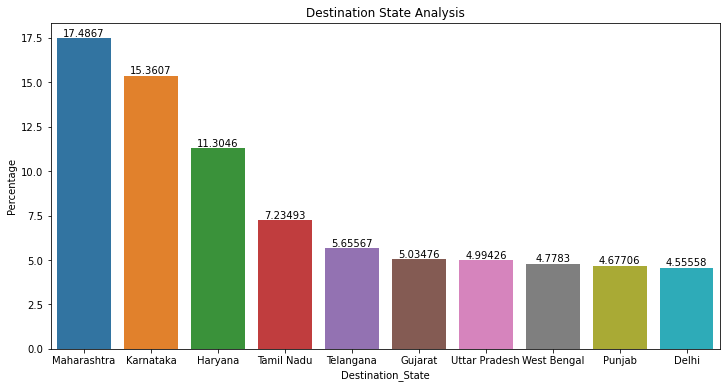

In [ ]:
plt.figure(figsize=(12,6))
graph = sns.barplot(x = 'Destination_State',y = 'Percentage', data= destinationStates, dodge = False)
for i in graph.containers:
    graph.bar_label(i,)
graph.set_title("Destination State Analysis", fontsize = 12)
plt.show()


In [ ]:
destinationCities = pd.DataFrame((data1.destination_city.value_counts()/len(data1)* 100)[:10])
destinationCities.reset_index(inplace=True)
destinationCities.columns = ['Destination_City', 'Percentage']
destinationCities

,Destination_City,Percentage
0,Bengaluru,7.126949
1,Mumbai,6.013363
2,Gurgaon,5.918877
3,Bangalore,4.359857
4,Hyderabad,4.251873
5,Bhiwandi,4.076399
6,Delhi,3.887427
7,Chandigarh,3.118040
8,Chennai,2.618614
9,Sonipat,2.530877


In [ ]:
top10DestinationCitie = list(destinationCities['Destination_City'])
top10DestinationCitie

['Bengaluru',
 'Mumbai',
 'Gurgaon',
 'Bangalore',
 'Hyderabad',
 'Bhiwandi',
 'Delhi',
 'Chandigarh',
 'Chennai',
 'Sonipat']

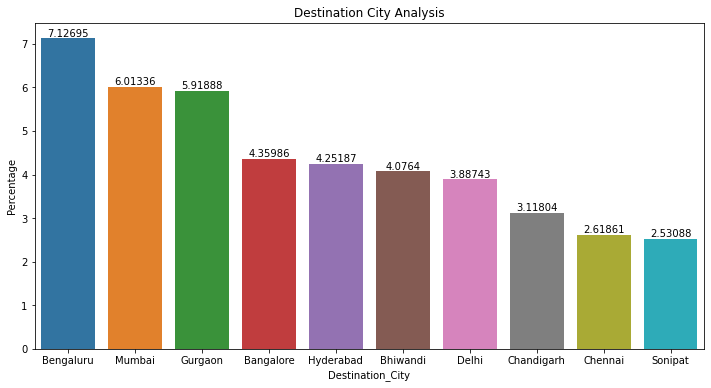

In [ ]:
plt.figure(figsize=(12,6))
graph = sns.barplot(x = 'Destination_City',y = 'Percentage', data= destinationCities, dodge = False)
for i in graph.containers:
    graph.bar_label(i,)
graph.set_title("Destination City Analysis", fontsize = 12)
plt.show()


From the above analysis around 45% of total trips are destined in this top 10 Cities

In [ ]:
data4 = data1.groupby(['destination_state', "destination_city"]).aggregate('destination_city').count()

In [ ]:
top_6_destination_states = list(destinationStates['Destination_State'][:6])
for x in top_6_destination_states:
    print('\033[1m' +"Top 5 Cities for Destination state:"+ x + '\033[0m')
    print(data4.loc[x].sort_values(ascending = False)[:5] / len(data1[data1['destination_state'] == x]) * 100)
    print('\033[1m' +"-------------------------------------------------------" +'\033[0m')

Top 5 Cities for Destination state:Maharashtra
destination_city
Mumbai                    34.388267
Bhiwandi                  23.311463
Pune                      13.238132
Mumbai Hub                 9.031262
PNQ Vadgaon Sheri DPC      1.852567
Name: destination_city, dtype: float64
-------------------------------------------------------
Top 5 Cities for Destination state:Karnataka
destination_city
Bengaluru         46.397188
Bangalore         28.383128
HBR Layout PC      5.843585
BLR                3.427065
Gulbarga           2.680141
Name: destination_city, dtype: float64
-------------------------------------------------------
Top 5 Cities for Destination state:Haryana
destination_city
Gurgaon      52.358209
Sonipat      22.388060
FBD           8.656716
Faridabad     4.537313
GGN           3.522388
Name: destination_city, dtype: float64
-------------------------------------------------------
Top 5 Cities for Destination state:Tamil Nadu
destination_city
Chennai        36.194030
MAA   

In [ ]:
top5EngagedSourceCenters = ['IND000000ACB', 'IND421302AAG', "IND562132AAA", "IND560099AAB", "IND160002AAC"]
print('\033[1m' +"Top 5 Source Centers:"+ '\033[0m')
for x in top5EngagedSourceCenters:
    val = round(len(data1.loc[data1.source_center == x]) / len(data1) * 100, 2)
    print('\033[1m' +"Source Center: "+ x + "(" +((data1.loc[data1.source_center == x]['source_state'])[:1]).iloc[0]+ ")" " Engaged with " + str(val) + " % of total sample trips"+'\033[0m')

Top 5 Source Centers:
Source Center: IND000000ACB(Haryana) Engaged with 6.4 % of total sample trips
Source Center: IND421302AAG(Maharashtra) Engaged with 5.47 % of total sample trips
Source Center: IND562132AAA(Karnataka) Engaged with 4.93 % of total sample trips
Source Center: IND560099AAB(Karnataka) Engaged with 2.88 % of total sample trips
Source Center: IND160002AAC(Punjab) Engaged with 2.5 % of total sample trips


In [ ]:
for x in top5EngagedSourceCenters:
    val = round(len(data1.loc[data1.source_center == x]) / len(data1) * 100, 2)
    print('\033[1m' +"Source Center: "+ x + "(" +((data1.loc[data1.source_center == x]['source_state'])[:1]).iloc[0]+ ")" " Engaged with " + str(val) + " % of total sample trips"+'\033[0m')
    destinationCenterEachSourceCenter = list(pd.DataFrame((data1[data1.source_center == x]['destination_center'].value_counts())[:5]).reset_index()['index'])
    for y in destinationCenterEachSourceCenter:
        value = round(len(data1[(data1.source_center == x) & (data1.destination_center == y)]) / len(data1.loc[data1.source_center == x]) * 100, 2)
        print("Destination Center: "+ y + " (" + data1.loc[data1.destination_center == y]['destination_state'][:1].iloc[0] +") Engaged for " + str(value) + " % of trips from this Source Center " +'\033[0m')

Source Center: IND000000ACB(Haryana) Engaged with 6.4 % of total sample trips
Destination Center: IND131028AAB (Haryana) Engaged for 9.7 % of trips from this Source Center 
Destination Center: IND122001AAA (Haryana) Engaged for 6.01 % of trips from this Source Center 
Destination Center: IND121002AAB (Haryana) Engaged for 6.01 % of trips from this Source Center 
Destination Center: IND110064AAA (Delhi) Engaged for 5.06 % of trips from this Source Center 
Destination Center: IND562132AAA (Karnataka) Engaged for 4.96 % of trips from this Source Center 
Source Center: IND421302AAG(Maharashtra) Engaged with 5.47 % of total sample trips
Destination Center: IND421302AAG (Maharashtra) Engaged for 13.93 % of trips from this Source Center 
Destination Center: IND400072AAB (Maharashtra) Engaged for 12.95 % of trips from this Source Center 
Destination Center: IND401104AAA (Maharashtra) Engaged for 7.77 % of trips from this Source Center 
Destination Center: IND411033AAA (Maharashtra) Engaged for

In [ ]:
agg = {"trip_uuid": "size","start_scan_to_end_scan": "mean","actual_distance_to_destination" : "mean", "source_city":"first",
       "source_state":"first","destination_city" : "first", "destination_state": "first", "actual_time" : "mean",
       "osrm_time": "mean", "osrm_distance":"mean","segment_actual_time" : "mean", "segment_osrm_time": "mean",
       "segment_osrm_distance": "mean", "Od_Start_End_Diff": "mean", "OdStartEnd_StartScanToEnd": "mean" }

In [ ]:
data1[(data1.source_center == 'IND160002AAC') & (data1.destination_center == 'IND160002AAC')]

,trip_uuid,trip_creation_time,source_center,destination_center,route_type,source_name,od_start_time,destination_name,od_end_time,start_scan_to_end_scan,...,destination_city,destination_place,destination_code,destination_state,month,year,hour,day,Od_Start_End_Diff,OdStartEnd_StartScanToEnd
33,trip-153671289374432394,2018-09-12 00:41:33.744568,IND160002AAC,IND160002AAC,Carting,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:41:33.744568,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 05:22:54.531616,281.0,...,Chandigarh,Mehmdpur,H,Punjab,September,2018,0,Wednesday,281.0,0.0
49,trip-153671398107484965,2018-09-12 00:59:41.075273,IND160002AAC,IND160002AAC,FTL,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:59:41.075273,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 08:54:15.446928,472.0,...,Chandigarh,Mehmdpur,H,Punjab,September,2018,0,Wednesday,474.0,2.0
52,trip-153671440490445199,2018-09-12 01:06:44.904707,IND160002AAC,IND160002AAC,Carting,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 01:06:44.904707,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 08:38:04.516365,230.0,...,Chandigarh,Mehmdpur,H,Punjab,September,2018,1,Wednesday,451.0,221.0
237,trip-153673275082213870,2018-09-12 06:12:30.822384,IND160002AAC,IND160002AAC,FTL,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 06:12:30.822384,Chandigarh_Mehmdpur_H (Punjab),2018-09-13 07:08:53.432828,1495.0,...,Chandigarh,Mehmdpur,H,Punjab,September,2018,6,Wednesday,1496.0,1.0
271,trip-153673633086629901,2018-09-12 07:12:10.866551,IND160002AAC,IND160002AAC,FTL,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 07:12:10.866551,Chandigarh_Mehmdpur_H (Punjab),2018-09-13 07:28:29.521683,1454.0,...,Chandigarh,Mehmdpur,H,Punjab,September,2018,7,Wednesday,1456.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14401,trip-153855369915702158,2018-10-03 08:01:39.157284,IND160002AAC,IND160002AAC,FTL,Chandigarh_Mehmdpur_H (Punjab),2018-10-03 08:01:39.157284,Chandigarh_Mehmdpur_H (Punjab),2018-10-04 04:30:47.609206,1228.0,...,Chandigarh,Mehmdpur,H,Punjab,October,2018,8,Wednesday,1229.0,1.0
14609,trip-153859604067443701,2018-10-03 19:47:20.674696,IND160002AAC,IND160002AAC,FTL,Chandigarh_Mehmdpur_H (Punjab),2018-10-03 19:47:20.674696,Chandigarh_Mehmdpur_H (Punjab),2018-10-04 10:57:51.223843,712.0,...,Chandigarh,Mehmdpur,H,Punjab,October,2018,19,Wednesday,910.0,198.0
14780,trip-153860945742225615,2018-10-03 23:30:57.422509,IND160002AAC,IND160002AAC,FTL,Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:30:57.422509,Chandigarh_Mehmdpur_H (Punjab),2018-10-04 08:22:38.058451,530.0,...,Chandigarh,Mehmdpur,H,Punjab,October,2018,23,Wednesday,531.0,1.0
14791,trip-153861000368799530,2018-10-03 23:40:03.688255,IND160002AAC,IND160002AAC,Carting,Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:40:03.688255,Chandigarh_Mehmdpur_H (Punjab),2018-10-04 04:54:37.816741,313.0,...,Chandigarh,Mehmdpur,H,Punjab,October,2018,23,Wednesday,314.0,1.0


In [ ]:
SourceDestination = data1.groupby(['source_center', "destination_center"]).agg(agg).reset_index().sort_values(['trip_uuid'], ascending= False)

In [ ]:
SourceDestination.trip_uuid.sum()

14817

In [ ]:
SourceDestination

,source_center,destination_center,trip_uuid,start_scan_to_end_scan,actual_distance_to_destination,source_city,source_state,destination_city,destination_state,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,Od_Start_End_Diff,OdStartEnd_StartScanToEnd
301,IND160002AAC,IND160002AAC,175,831.897143,229.050532,Chandigarh,Punjab,Chandigarh,Punjab,518.782857,234.297143,282.745442,514.674286,246.262857,283.199605,911.491429,79.594286
1356,IND562132AAA,IND560300AAA,151,183.033113,28.022125,Bangalore,Karnataka,Bengaluru,Karnataka,87.874172,48.046358,38.078472,86.682119,51.245033,45.303726,183.033113,0.000000
2006,IND842001AAA,IND842001AAA,130,1025.700000,183.674728,Muzaffrpur,Bihar,Muzaffrpur,Bihar,723.330769,173.730769,230.747738,720.761538,181.138462,239.883924,1040.176923,14.476923
1311,IND560099AAB,IND560300AAA,121,198.305785,41.727380,Bengaluru,Karnataka,Bengaluru,Karnataka,114.661157,56.743802,53.130012,112.991736,63.223140,60.574417,198.305785,0.000000
939,IND421302AAG,IND421302AAG,113,567.858407,88.039656,Bhiwandi,Maharashtra,Bhiwandi,Maharashtra,253.079646,84.530973,110.565473,251.327434,86.309735,112.861473,599.893805,32.035398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,IND147001AAB,IND160002AAC,1,294.000000,31.454064,Patiala,Punjab,Chandigarh,Punjab,234.000000,33.000000,45.861200,233.000000,150.000000,113.552000,294.000000,0.000000
1161,IND505001AAB,IND505184AAC,1,229.000000,62.699021,Karimnagar,Telangana,Manthani,Telangana,210.000000,63.000000,69.744000,210.000000,62.000000,69.744000,229.000000,0.000000
1163,IND505122AAA,IND506002AAA,1,336.000000,35.781807,Jammikunta,Telangana,Warangal,Telangana,110.000000,40.000000,48.585600,109.000000,39.000000,48.585600,336.000000,0.000000
1165,IND505184AAC,IND505209AAA,1,39.000000,17.018146,Manthani,Telangana,Ramagundam,Telangana,33.000000,43.000000,19.517400,33.000000,43.000000,19.517400,39.000000,0.000000


In [ ]:
SourceDestination[:5]

,source_center,destination_center,trip_uuid,start_scan_to_end_scan,actual_distance_to_destination,source_city,source_state,destination_city,destination_state,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,Od_Start_End_Diff,OdStartEnd_StartScanToEnd
301,IND160002AAC,IND160002AAC,175,831.897143,229.050532,Chandigarh,Punjab,Chandigarh,Punjab,518.782857,234.297143,282.745442,514.674286,246.262857,283.199605,911.491429,79.594286
1356,IND562132AAA,IND560300AAA,151,183.033113,28.022125,Bangalore,Karnataka,Bengaluru,Karnataka,87.874172,48.046358,38.078472,86.682119,51.245033,45.303726,183.033113,0.000000
2006,IND842001AAA,IND842001AAA,130,1025.700000,183.674728,Muzaffrpur,Bihar,Muzaffrpur,Bihar,723.330769,173.730769,230.747738,720.761538,181.138462,239.883924,1040.176923,14.476923
1311,IND560099AAB,IND560300AAA,121,198.305785,41.727380,Bengaluru,Karnataka,Bengaluru,Karnataka,114.661157,56.743802,53.130012,112.991736,63.223140,60.574417,198.305785,0.000000
939,IND421302AAG,IND421302AAG,113,567.858407,88.039656,Bhiwandi,Maharashtra,Bhiwandi,Maharashtra,253.079646,84.530973,110.565473,251.327434,86.309735,112.861473,599.893805,32.035398


In [ ]:
agg2 = {"trip_uuid": "size","start_scan_to_end_scan": "mean","actual_distance_to_destination" : "mean", "source_city":"first",
       "source_state":"first", "actual_time" : "mean", "osrm_time": "mean", "osrm_distance":"mean","segment_actual_time" : "mean", "segment_osrm_time": "mean",
       "segment_osrm_distance": "mean", "Od_Start_End_Diff": "mean", "OdStartEnd_StartScanToEnd": "mean", "destination_center":pd.Series.nunique, "destination_state":pd.Series.nunique }

In [ ]:
SourceCenter = data1.groupby(['source_center']).agg(agg2).reset_index().sort_values(['trip_uuid'], ascending= False)
SourceCenter

,source_center,trip_uuid,start_scan_to_end_scan,actual_distance_to_destination,source_city,source_state,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,Od_Start_End_Diff,OdStartEnd_StartScanToEnd,destination_center,destination_state
4,IND000000ACB,948,941.303797,408.639667,Gurgaon,Haryana,754.231013,373.107595,496.439967,746.232068,438.812236,562.947660,943.844937,2.541139,52,16
368,IND421302AAG,811,671.580764,239.639152,Bhiwandi,Maharashtra,469.427867,216.310727,293.564623,464.934649,241.813810,318.466358,676.075216,4.494451,30,13
545,IND562132AAA,731,758.818057,307.316264,Bangalore,Karnataka,553.675787,292.166895,375.982188,547.537620,324.689466,407.737845,765.616963,6.798906,36,12
536,IND560099AAB,426,209.345070,42.600142,Bengaluru,Karnataka,99.046948,53.330986,51.841636,97.774648,58.185446,58.612035,209.366197,0.021127,14,3
93,IND160002AAC,370,924.845946,325.099231,Chandigarh,Punjab,638.697297,307.175676,397.136815,632.932432,333.600000,417.393149,968.000000,43.154054,24,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,IND635601AAB,1,290.000000,85.082328,Tiruppattur,Tamil Nadu,244.000000,67.000000,89.544800,242.000000,71.000000,94.722700,291.000000,1.000000,1,1
648,IND635001AAA,1,186.000000,72.247674,Krishnagiri,Tamil Nadu,117.000000,81.000000,89.435000,115.000000,86.000000,93.474100,611.000000,425.000000,1,1
417,IND466116AAA,1,775.000000,86.824433,Ashta,Madhya Pradesh,164.000000,74.000000,103.177100,163.000000,81.000000,98.774300,775.000000,0.000000,1,1
45,IND124112AAA,1,724.000000,198.999910,Meham,Haryana,553.000000,176.000000,227.636000,552.000000,215.000000,249.446700,725.000000,1.000000,1,1


In [ ]:
SourceCenter[:5]

,source_center,trip_uuid,start_scan_to_end_scan,actual_distance_to_destination,source_city,source_state,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,Od_Start_End_Diff,OdStartEnd_StartScanToEnd,destination_center,destination_state
4,IND000000ACB,948,941.303797,408.639667,Gurgaon,Haryana,754.231013,373.107595,496.439967,746.232068,438.812236,562.947660,943.844937,2.541139,52,16
368,IND421302AAG,811,671.580764,239.639152,Bhiwandi,Maharashtra,469.427867,216.310727,293.564623,464.934649,241.813810,318.466358,676.075216,4.494451,30,13
545,IND562132AAA,731,758.818057,307.316264,Bangalore,Karnataka,553.675787,292.166895,375.982188,547.537620,324.689466,407.737845,765.616963,6.798906,36,12
536,IND560099AAB,426,209.345070,42.600142,Bengaluru,Karnataka,99.046948,53.330986,51.841636,97.774648,58.185446,58.612035,209.366197,0.021127,14,3
93,IND160002AAC,370,924.845946,325.099231,Chandigarh,Punjab,638.697297,307.175676,397.136815,632.932432,333.600000,417.393149,968.000000,43.154054,24,8


In [ ]:
SourceDestination[SourceDestination.actual_time == SourceCenter.actual_time.min()]

,source_center,destination_center,trip_uuid,start_scan_to_end_scan,actual_distance_to_destination,source_city,source_state,destination_city,destination_state,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,Od_Start_End_Diff,OdStartEnd_StartScanToEnd
202,IND131021AAA,IND131028AAA,58,45.827586,11.911455,Sonipat,Haryana,Sonipat,Haryana,17.465517,10.327586,12.60184,17.189655,10.637931,13.210497,45.827586,0.0


In [ ]:
SourceDestination.tail()

,source_center,destination_center,trip_uuid,start_scan_to_end_scan,actual_distance_to_destination,source_city,source_state,destination_city,destination_state,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,Od_Start_End_Diff,OdStartEnd_StartScanToEnd
270,IND147001AAB,IND160002AAC,1,294.0,31.454064,Patiala,Punjab,Chandigarh,Punjab,234.0,33.0,45.8612,233.0,150.0,113.5520,294.0,0.0
1161,IND505001AAB,IND505184AAC,1,229.0,62.699021,Karimnagar,Telangana,Manthani,Telangana,210.0,63.0,69.7440,210.0,62.0,69.7440,229.0,0.0
1163,IND505122AAA,IND506002AAA,1,336.0,35.781807,Jammikunta,Telangana,Warangal,Telangana,110.0,40.0,48.5856,109.0,39.0,48.5856,336.0,0.0
1165,IND505184AAC,IND505209AAA,1,39.0,17.018146,Manthani,Telangana,Ramagundam,Telangana,33.0,43.0,19.5174,33.0,43.0,19.5174,39.0,0.0
137,IND110078AAA,IND110043AAA,1,93.0,12.207495,Janakpuri,Delhi,Delhi,Delhi,37.0,20.0,19.1515,37.0,24.0,18.5128,93.0,0.0


## One Hot Encoding for categorical feature

Here for One hot encoding I am going to consider Route_type and Data Features. Is_Cutoof feature will not be considered as here one Trip Id is having both True and False value

In [ ]:
one_hot_encoded_data = data1

In [ ]:
one_hot_encoded_data.drop(columns=['source_name', 'destination_name', 'od_start_time', 'od_end_time'], inplace = True)

In [ ]:
one_hot_encoded_data = pd.get_dummies(one_hot_encoded_data, columns = ['route_type','data'])
one_hot_encoded_data

,trip_uuid,trip_creation_time,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,...,month,year,hour,day,Od_Start_End_Diff,OdStartEnd_StartScanToEnd,route_type_Carting,route_type_FTL,data_test,data_training
0,trip-153671041653548748,2018-09-12 00:00:16.535741,IND462022AAA,IND000000ACB,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,...,September,2018,0,Wednesday,2260.0,1.0,0,1,0,1
1,trip-153671042288605164,2018-09-12 00:00:22.886430,IND572101AAA,IND562101AAA,180.0,73.186911,143.0,68.0,85.1110,141.0,...,September,2018,0,Wednesday,181.0,1.0,1,0,0,1
2,trip-153671043369099517,2018-09-12 00:00:33.691250,IND562132AAA,IND160002AAC,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,...,September,2018,0,Wednesday,3934.0,1.0,0,1,0,1
3,trip-153671046011330457,2018-09-12 00:01:00.113710,IND400072AAB,IND401104AAA,100.0,17.175274,59.0,15.0,19.6800,59.0,...,September,2018,0,Wednesday,100.0,0.0,1,0,0,1
4,trip-153671052974046625,2018-09-12 00:02:09.740725,IND583101AAA,IND583101AAA,717.0,127.448500,341.0,117.0,146.7918,340.0,...,September,2018,0,Wednesday,718.0,1.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,2018-10-03 23:55:56.258533,IND160002AAC,IND160002AAC,257.0,57.762332,83.0,62.0,73.4630,82.0,...,October,2018,23,Wednesday,405.0,148.0,1,0,1,0
14813,trip-153861104386292051,2018-10-03 23:57:23.863155,IND121004AAB,IND121004AAA,60.0,15.513784,21.0,12.0,16.0882,21.0,...,October,2018,23,Wednesday,60.0,0.0,1,0,1,0
14814,trip-153861106442901555,2018-10-03 23:57:44.429324,IND209304AAA,IND209304AAA,421.0,38.684839,282.0,48.0,58.9037,281.0,...,October,2018,23,Wednesday,422.0,1.0,1,0,1,0
14815,trip-153861115439069069,2018-10-03 23:59:14.390954,IND627005AAA,IND627005AAA,347.0,134.723836,264.0,179.0,171.1103,258.0,...,October,2018,23,Wednesday,348.0,1.0,1,0,1,0


After one hot encoding for features route_type and data now we can see New features added route_type_Carting, route_type_FTL, data_test and data_training

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
isNumeric = data1.select_dtypes(include=numerics)
isNumeric

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,year,hour,Od_Start_End_Diff,OdStartEnd_StartScanToEnd
0,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,2018,0,2260.0,1.0
1,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,2018,0,181.0,1.0
2,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,2018,0,3934.0,1.0
3,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,2018,0,100.0,0.0
4,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,2018,0,718.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14812,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551,2018,23,405.0,148.0
14813,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883,2018,23,60.0,0.0
14814,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866,2018,23,422.0,1.0
14815,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324,2018,23,348.0,1.0


In [ ]:
isNumeric.drop(columns=["year"], inplace=True)

In [ ]:
correlationForData1 = isNumeric.corr(method="spearman")
correlationForData1

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,hour,Od_Start_End_Diff,OdStartEnd_StartScanToEnd
start_scan_to_end_scan,1.000000,0.841237,0.898719,0.845000,0.849367,0.898461,0.839760,0.846687,0.062573,0.995257,0.444688
actual_distance_to_destination,0.841237,1.000000,0.903771,0.979430,0.991347,0.902311,0.968331,0.983914,0.083960,0.840031,0.451176
actual_time,0.898719,0.903771,1.000000,0.906135,0.911572,0.999960,0.902708,0.910761,0.023516,0.897545,0.452223
osrm_time,0.845000,0.979430,0.906135,1.000000,0.989835,0.904770,0.989731,0.984492,0.085280,0.843604,0.453479
osrm_distance,0.849367,0.991347,0.911572,0.989835,1.000000,0.910231,0.979501,0.991350,0.082568,0.848013,0.454730
segment_actual_time,0.898461,0.902311,0.999960,0.904770,0.910231,1.000000,0.901340,0.909407,0.023194,0.897346,0.452363
segment_osrm_time,0.839760,0.968331,0.902708,0.989731,0.979501,0.901340,1.000000,0.989041,0.080188,0.837832,0.434869
segment_osrm_distance,0.846687,0.983914,0.910761,0.984492,0.991350,0.909407,0.989041,1.000000,0.079758,0.844945,0.441410
hour,0.062573,0.083960,0.023516,0.085280,0.082568,0.023194,0.080188,0.079758,1.000000,0.062306,0.070520
Od_Start_End_Diff,0.995257,0.840031,0.897545,0.843604,0.848013,0.897346,0.837832,0.844945,0.062306,1.000000,0.485053


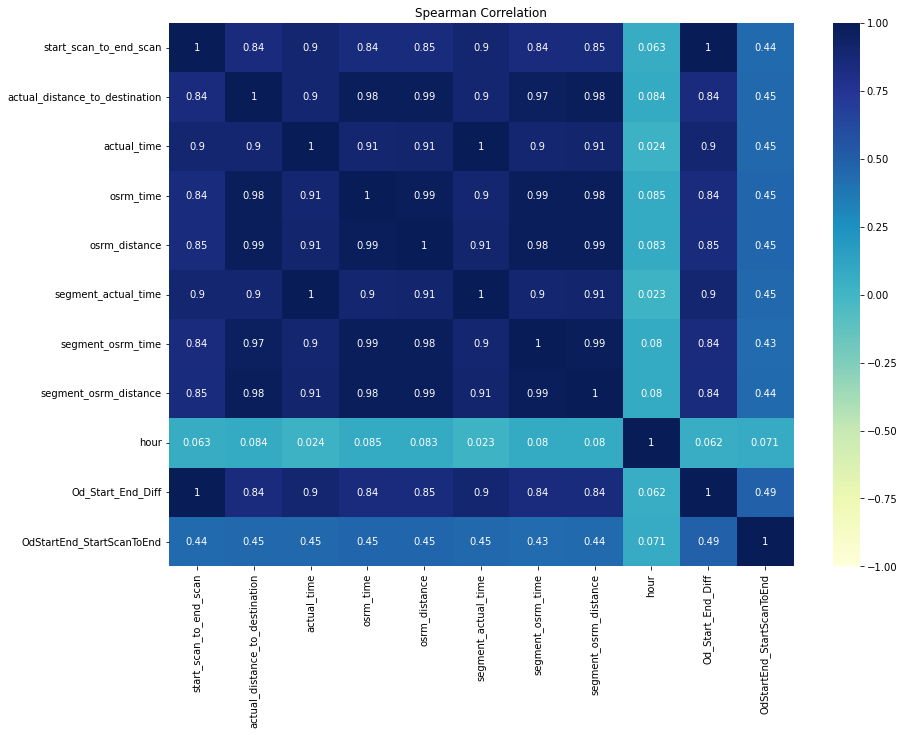

In [ ]:
plt.figure(figsize=(14,10))
heatmap = sns.heatmap(isNumeric.corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap="YlGnBu")
plt.title("Spearman Correlation")
plt.show()

### Min Max Scaling (Normalization)

Here all the values will be scaled in between the range of [0,1] where 0 is the minimum value and 1 is the maximum value.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
minMax_scaled_data = scaler.fit_transform(isNumeric)
minMax_scaled_data = pd.DataFrame(minMax_scaled_data, columns=isNumeric.columns)

In [ ]:
minMax_scaled_data.head(10)

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,hour,Od_Start_End_Diff,OdStartEnd_StartScanToEnd
0,0.283937,0.374613,0.248242,0.350938,0.346972,0.247388,0.391712,0.373134,0.0,0.284063,0.000423
1,0.019937,0.029476,0.021419,0.030602,0.026859,0.021218,0.023065,0.021373,0.0,0.020063,0.000423
2,0.496508,0.880999,0.533568,0.855874,0.828325,0.530301,0.756450,0.721625,0.0,0.496635,0.000423
3,0.009778,0.003753,0.007992,0.004442,0.003747,0.008037,0.003909,0.003074,0.0,0.009778,0.000000
4,0.088127,0.054395,0.053069,0.054788,0.048647,0.053207,0.042611,0.039185,0.0,0.088254,0.000423
5,0.021079,0.007162,0.008312,0.008391,0.006708,0.008198,0.006646,0.005404,0.0,0.021206,0.000423
6,0.009524,0.000045,0.002398,0.003455,0.001040,0.002411,0.002737,0.000838,0.0,0.009524,0.000000
7,0.015619,0.006164,0.008792,0.013820,0.007011,0.008841,0.010946,0.005647,0.0,0.019429,0.012701
8,0.032635,0.007556,0.024297,0.011352,0.007723,0.024433,0.008991,0.006221,0.0,0.036444,0.012701
9,0.003302,0.000399,0.002238,0.000987,0.000312,0.002250,0.003127,0.001995,0.0,0.003302,0.000000


## Standard Scaler (Standardization)

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
standard_scaled_data = std_scaler.fit_transform(isNumeric)
standard_scaled_data = pd.DataFrame(standard_scaled_data, columns=isNumeric.columns)

In [ ]:
standard_scaled_data.head(10)

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,hour,Od_Start_End_Diff,OdStartEnd_StartScanToEnd
0,2.623961,2.162092,2.146251,2.047585,2.124848,2.146791,2.629468,2.633784,-1.558901,2.561997,-0.200500
1,-0.532591,-0.298944,-0.381461,-0.344144,-0.321920,-0.382742,-0.368643,-0.333670,-1.558901,-0.547326,-0.200500
2,5.165600,5.772935,5.325931,5.817598,5.804050,5.310954,5.595785,5.573660,-1.558901,5.065608,-0.200500
3,-0.654055,-0.482362,-0.531093,-0.539462,-0.498578,-0.530163,-0.524430,-0.488040,-1.558901,-0.668469,-0.213708
4,0.282738,-0.121257,-0.028757,-0.163566,-0.155387,-0.024976,-0.209676,-0.183405,-1.558901,0.255804,-0.200500
5,-0.518926,-0.458058,-0.527531,-0.509980,-0.475940,-0.528365,-0.502175,-0.468386,-1.558901,-0.533866,-0.200500
6,-0.657092,-0.508804,-0.593440,-0.546833,-0.519263,-0.593087,-0.533968,-0.506902,-1.558901,-0.671460,-0.213708
7,-0.584213,-0.465173,-0.522187,-0.469442,-0.473630,-0.521174,-0.467202,-0.466333,-1.558901,-0.554804,0.182523
8,-0.380761,-0.455249,-0.349397,-0.487869,-0.468188,-0.346786,-0.483099,-0.461495,-1.558901,-0.354396,0.182523
9,-0.731489,-0.506277,-0.595221,-0.565259,-0.524830,-0.594885,-0.530789,-0.497139,-1.558901,-0.744743,-0.213708


In [ ]:
CartingData = data1[data1.route_type == 'Carting']
CartingData

,trip_uuid,trip_creation_time,source_center,destination_center,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,...,destination_city,destination_place,destination_code,destination_state,month,year,hour,day,Od_Start_End_Diff,OdStartEnd_StartScanToEnd
1,trip-153671042288605164,2018-09-12 00:00:22.886430,IND572101AAA,IND562101AAA,Carting,180.0,73.186911,143.0,68.0,85.1110,...,Chikblapur,ShntiSgr,D,Karnataka,September,2018,0,Wednesday,181.0,1.0
3,trip-153671046011330457,2018-09-12 00:01:00.113710,IND400072AAB,IND401104AAA,Carting,100.0,17.175274,59.0,15.0,19.6800,...,Mumbai,MiraRd,IP,Maharashtra,September,2018,0,Wednesday,100.0,0.0
5,trip-153671055416136166,2018-09-12 00:02:34.161600,IND600116AAB,IND602105AAB,Carting,189.0,24.597048,61.0,23.0,28.0647,...,Chennai,Sriperumbudur,Dc,Tamil Nadu,September,2018,0,Wednesday,190.0,1.0
6,trip-153671066201138152,2018-09-12 00:04:22.011653,IND600044AAD,IND600048AAA,Carting,98.0,9.100510,24.0,13.0,12.0184,...,Chennai,Vandalur,Dc,Tamil Nadu,September,2018,0,Wednesday,98.0,0.0
7,trip-153671066826362165,2018-09-12 00:04:28.263977,IND560043AAC,IND560043AAC,Carting,146.0,22.424210,64.0,34.0,28.9203,...,HBR Layout PC,Central,H,Karnataka,September,2018,0,Wednesday,176.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14811,trip-153861091843037040,2018-10-03 23:55:18.430664,IND400072AAB,IND401104AAA,Carting,88.0,17.760248,38.0,16.0,20.5065,...,Mumbai,MiraRd,IP,Maharashtra,October,2018,23,Wednesday,88.0,0.0
14812,trip-153861095625827784,2018-10-03 23:55:56.258533,IND160002AAC,IND160002AAC,Carting,257.0,57.762332,83.0,62.0,73.4630,...,Chandigarh,Mehmdpur,H,Punjab,October,2018,23,Wednesday,405.0,148.0
14813,trip-153861104386292051,2018-10-03 23:57:23.863155,IND121004AAB,IND121004AAA,Carting,60.0,15.513784,21.0,12.0,16.0882,...,Faridabad,Blbgarh,DC,Haryana,October,2018,23,Wednesday,60.0,0.0
14814,trip-153861106442901555,2018-10-03 23:57:44.429324,IND209304AAA,IND209304AAA,Carting,421.0,38.684839,282.0,48.0,58.9037,...,Kanpur,Central,H,Uttar Pradesh,October,2018,23,Wednesday,422.0,1.0


In [ ]:
CartingGroupByState = CartingData.groupby('source_state').agg(agg2).sort_values("trip_uuid", ascending=False)
CartingGroupByState

,trip_uuid,start_scan_to_end_scan,actual_distance_to_destination,source_city,source_state,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,Od_Start_End_Diff,OdStartEnd_StartScanToEnd,destination_center,destination_state
source_state,,,,,,,,,,,,,,,
Maharashtra,1981,214.819788,27.853212,Mumbai Hub,Maharashtra,100.460878,29.852600,35.796879,99.658253,30.596668,37.054327,219.221605,4.401817,76,2
Karnataka,1773,210.073322,35.969037,Tumkur,Karnataka,100.224478,47.823463,45.643488,98.858996,52.267343,50.993434,211.810491,1.737169,43,1
Haryana,1032,222.198643,43.213832,FBD,Haryana,120.180233,54.831395,57.351015,118.363372,73.556202,70.583786,222.737403,0.538760,35,4
Tamil Nadu,753,221.998672,50.402102,Chennai,Tamil Nadu,121.535193,55.892430,63.430791,119.660027,62.090305,69.241392,225.043825,3.045153,40,1
Delhi,612,208.676471,31.058390,Delhi,Delhi,108.352941,39.679739,38.832807,107.142157,41.906863,41.869662,208.699346,0.022876,25,3
West Bengal,434,304.334101,47.858206,Kolkata,West Bengal,182.857143,61.456221,70.243091,181.384793,66.509217,76.939545,317.771889,13.437788,38,1
Uttar Pradesh,403,391.905707,46.047644,Kanpur,Uttar Pradesh,225.625310,53.267990,62.806113,224.044665,69.362283,81.393939,423.863524,31.957816,47,4
Gujarat,399,216.213033,43.917112,Surat,Gujarat,119.423559,44.952381,53.588902,118.087719,47.614035,58.676115,229.967419,13.754386,38,3
Telangana,388,262.615979,28.402599,Hyderabad,Telangana,107.837629,30.652062,36.739016,106.798969,37.247423,43.444036,264.407216,1.791237,17,1


In [ ]:
CartingGroupByState['Percentage'] = CartingGroupByState['trip_uuid'] / len(CartingData) * 100
CartingGroupByState['PercentageFromOverallTrips'] = CartingGroupByState['trip_uuid'] / len(data1) * 100

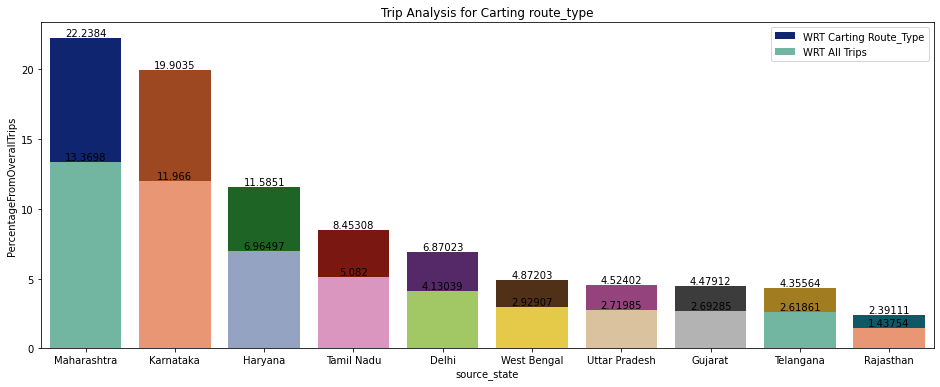

In [ ]:
plt.figure(figsize=(16, 6))
graph = sns.barplot(x = 'source_state', y = 'Percentage', data = CartingGroupByState[:10],palette='dark', label = "WRT Carting Route_Type")
graph1 = sns.barplot(x = 'source_state', y = 'PercentageFromOverallTrips', data = CartingGroupByState[:10], palette="Set2", label = "WRT All Trips")
for i in graph.containers:
    graph.bar_label(i,)
graph.set_title("Trip Analysis for Carting route_type", fontsize = 12)
plt.legend()
plt.show()

Top 10 Source States for carting route_type are Maharashtra , Karnataka, tamilnadu, Delhi, west bengal, Uttar Pradesh, Gujarat Telangana and Rjasthan which gives almost 90 percent of all the carting trips
and 53 % of total trips

In [ ]:
data1.route_type.value_counts(normalize=True)

Carting    0.601201
FTL        0.398799
Name: route_type, dtype: float64

In [ ]:
FTLData = data1[data1.route_type == 'FTL']
FTLData

,trip_uuid,trip_creation_time,source_center,destination_center,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,...,destination_city,destination_place,destination_code,destination_state,month,year,hour,day,Od_Start_End_Diff,OdStartEnd_StartScanToEnd
0,trip-153671041653548748,2018-09-12 00:00:16.535741,IND462022AAA,IND000000ACB,FTL,2259.0,824.732854,1562.0,717.0,991.3523,...,Gurgaon,Bilaspur,HB,Haryana,September,2018,0,Wednesday,2260.0,1.0
2,trip-153671043369099517,2018-09-12 00:00:33.691250,IND562132AAA,IND160002AAC,FTL,3933.0,1927.404273,3347.0,1740.0,2354.0665,...,Chandigarh,Mehmdpur,H,Punjab,September,2018,0,Wednesday,3934.0,1.0
4,trip-153671052974046625,2018-09-12 00:02:09.740725,IND583101AAA,IND583101AAA,FTL,717.0,127.448500,341.0,117.0,146.7918,...,Bellary,Dc,H,Karnataka,September,2018,0,Wednesday,718.0,1.0
12,trip-153671117375890592,2018-09-12 00:12:53.759171,IND416012AAA,IND416012AAA,FTL,1038.0,219.424984,762.0,227.0,297.1036,...,Kolhapur,Shivaji,I,Maharashtra,September,2018,0,Wednesday,1039.0,1.0
13,trip-153671121411074590,2018-09-12 00:13:34.111131,IND501359AAE,IND562132AAA,FTL,995.0,474.446597,809.0,428.0,542.0812,...,Bangalore,Nelmngla,H,Karnataka,September,2018,0,Wednesday,996.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14793,trip-153861004148234782,2018-10-03 23:40:41.482736,IND826004AAA,IND816107AAA,FTL,428.0,168.396341,349.0,220.0,207.4975,...,Pakur,Hatpada,D,Jharkhand,October,2018,23,Wednesday,430.0,2.0
14794,trip-153861007249500192,2018-10-03 23:41:12.495257,IND842001AAA,IND842001AAA,FTL,1017.0,193.129289,847.0,176.0,226.5252,...,Muzaffrpur,Bbganj,I,Bihar,October,2018,23,Wednesday,1019.0,2.0
14795,trip-153861014185597051,2018-10-03 23:42:21.856227,IND462022AAA,IND000000ACB,FTL,2180.0,836.072017,1674.0,717.0,997.7577,...,Gurgaon,Bilaspur,HB,Haryana,October,2018,23,Wednesday,2182.0,2.0
14797,trip-153861023893369544,2018-10-03 23:43:58.933947,IND384205AAA,IND382430AAB,FTL,256.0,84.743813,187.0,92.0,102.3828,...,Ahmedabad,East,H,Gujarat,October,2018,23,Wednesday,257.0,1.0


In [ ]:
FLTGroupByState = FTLData.groupby('source_state').agg(agg2).sort_values("trip_uuid", ascending=False)
FLTGroupByState

,trip_uuid,start_scan_to_end_scan,actual_distance_to_destination,source_city,source_state,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,Od_Start_End_Diff,OdStartEnd_StartScanToEnd,destination_center,destination_state
source_state,,,,,,,,,,,,,,,
Maharashtra,701,1042.457917,434.611388,Kolhapur,Maharashtra,823.845934,392.593438,527.724906,816.082739,436.977175,567.822869,1048.609130,6.151213,49,14
Haryana,662,1409.608761,617.395472,Gurgaon,Haryana,1133.971299,559.569486,748.324990,1123.075529,645.575529,836.278260,1439.045317,29.436556,64,18
Punjab,494,796.020243,275.281266,Jalandhar,Punjab,547.271255,261.251012,336.086711,542.777328,284.095142,353.545853,828.281377,32.261134,40,7
Karnataka,456,1356.379386,562.563311,Bangalore,Karnataka,1017.388158,529.052632,688.279590,1007.296053,585.304825,741.546306,1388.144737,31.765351,53,13
Telangana,392,873.561224,315.275200,Hyderabad,Telangana,590.313776,295.301020,389.408183,584.895408,320.614796,409.227862,903.104592,29.543367,47,9
Gujarat,347,741.587896,295.584937,Mehsana,Gujarat,531.037464,276.103746,358.263576,526.412104,293.221902,376.176509,751.077810,9.489914,37,7
Bihar,339,722.466077,172.585020,Sasaram,Bihar,527.126844,156.634218,210.272849,524.569322,175.410029,233.487006,738.817109,16.351032,35,2
Tamil Nadu,332,606.328313,218.367213,Dindigul,Tamil Nadu,396.403614,229.900602,272.293995,392.740964,243.099398,279.089068,623.957831,17.629518,37,9
Uttar Pradesh,318,750.550314,195.477748,Allahabad,Uttar Pradesh,486.468553,204.022013,246.496117,483.437107,239.418239,283.067040,794.616352,44.066038,58,6


In [ ]:
FLTGroupByState['Percentage'] = FLTGroupByState['trip_uuid'] / len(FTLData) * 100
FLTGroupByState['PercentageFromOverallTrips'] = FLTGroupByState['trip_uuid'] / len(data1) * 100

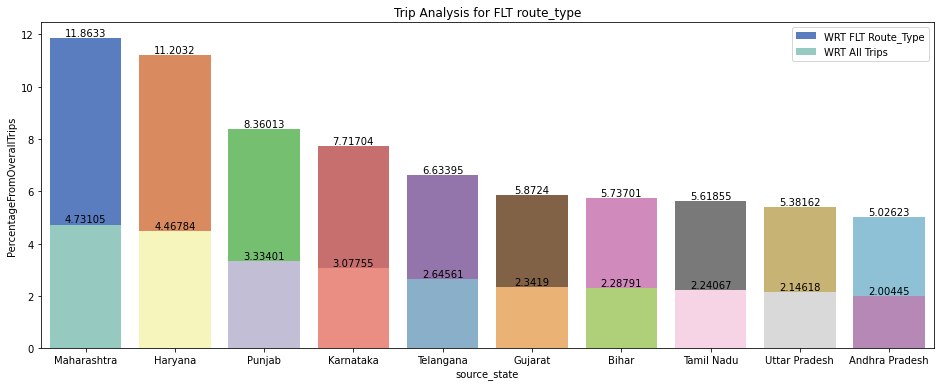

In [ ]:
plt.figure(figsize=(16, 6))
graph = sns.barplot(x = 'source_state', y = 'Percentage', data = FLTGroupByState[:10],palette='muted', label = "WRT FLT Route_Type")
graph1 = sns.barplot(x = 'source_state', y = 'PercentageFromOverallTrips', data = FLTGroupByState[:10], palette="Set3", label = "WRT All Trips")
for i in graph.containers:
    graph.bar_label(i,)
graph.set_title("Trip Analysis for FLT route_type", fontsize = 12)
plt.legend()
plt.show()

# Recommendations

1. While performing hypothesis testing it is observed that there is incosistency between features Actual time and OSRM time, OSRM Time and segmented OSRM time, OSRM Distance and Segmented OSRM Distance, To deal with system generated timings and Actual timings Delhivery should choose advanced technologies with tracking capabilities which can provide exact real time information with very high acuracy. Using satellite receivers, GPS trackers will help couriers navigate through routes, identify good driving behaviour, and record all the trips of a certain person or vehicle
2. Delhivery may experment using crowdsourcing for faster deliveries
3. As per the data we can see most of the deliveries are intrastate, so to increase the delievries with other states as well company can provide several offers and discounts
4. Company can collabrate with other merchants to increase thier customer base.
5. They can provide discounts and special offers for thier regular customers and provide strong support in order to not to loose thier customers.
6. Top 10 Source States for carting route_type are Maharashtra , Karnataka, tamilnadu, Delhi, west bengal, Uttar Pradesh, Gujarat Telangana and Rjasthan so company can colabrate with mercahnts small buisnesses by making them regular customer from the other states as well
7. Top 10 Source States for carting route_type are Maharashtra, Haryana, Punjab , Karnataka, Telangana, Gujarat, Bihar,Tamilnadu, Uttar Pradesh, and Andhra Pradesh. Company can improvise thier FTL service in order to give better customer experience and adveryise it more in order to incraese the buisiness
8. Sending promotional emails to your target customers is another excellent way to expand your courier service business. this email marketing should be implemented by the company
9. Company can offer exciting prizes, offers, discouts or schemes like 1 free delivery in exchange of referals
10. Building an Customer enagaging websites, seeking constant feedbacks from customers also would be very helpful
